### Libraries for the Project

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
import xgboost as xgb
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from prophet import Prophet
from transformers import pipeline



### DATA EXTRACTION FROM YAHOO FINANCE

1. CURRENCY DATASET

In [2]:
# Top Currencies
currency_pairs = {
    "EUR/USD": "EURUSD=X",
    "GBP/USD": "GBPUSD=X",
    "USD/JPY": "JPY=X",
    "AUD/JPY": "AUDJPY=X",
    "USD/CAD": "CAD=X"
}

# Period
start_date = "2014-01-01"
end_date = "2024-09-15"

all_data = pd.DataFrame()

# Downloading data for each currency pair and storing in the dataframe
for pair, ticker in currency_pairs.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    # Renaming the 'Adj Close' column to the currency pair name for clarity purposes
    data = data[['Adj Close']].rename(columns={'Adj Close': pair})
    # Merging the data using date index (outer join)
    if all_data.empty:
        all_data = data
    else:
        all_data = all_data.join(data, how='outer')
curr_data=all_data
curr_data.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EUR/USD   GBP/USD     USD/JPY    AUD/JPY  USD/CAD
Date                                                          
2014-01-01  1.374495  1.656397  105.300003  93.769997  1.06193
2014-01-02  1.376671  1.658072  105.323997  93.619003  1.06445
2014-01-03  1.366662  1.644791  104.833000  93.350998  1.06691
2014-01-06  1.359601  1.641309  104.912003  94.041000  1.06305
2014-01-07  1.363196  1.641794  104.209999  93.425003  1.06609

2. MAJOR STOCK DATASET

In [3]:
#TOP TRADING STOCKS
top_stocks = ["AAPL", "MSFT", "AMZN", "GOOGL", "NVDA"]

# PERIOD
start_date = "2014-01-01"
end_date = "2024-09-15"

all_stock_data = pd.DataFrame()

# Downloading data for each major stock 
for stock in top_stocks:
    data = yf.download(stock, start=start_date, end=end_date)
    
    # Renaming the 'Adj Close' column to the stock name for clarity purposes
    data = data[['Adj Close']].rename(columns={'Adj Close': stock})
    
    # Merging the data using date index (outer join)
    if all_stock_data.empty:
        all_stock_data = data
    else:
        all_stock_data = all_stock_data.join(data, how='outer')

stock_data=all_stock_data
stock_data.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL       MSFT       AMZN      GOOGL      NVDA
Date                                                            
2014-01-02  17.253256  31.120728  19.898500  27.787050  0.373992
2014-01-03  16.874279  30.911371  19.822001  27.584349  0.369512
2014-01-06  16.966291  30.258137  19.681499  27.891897  0.374464
2014-01-07  16.844955  30.492636  19.901501  28.429604  0.380595
2014-01-08  16.951635  29.948259  20.096001  28.488766  0.385782

# Exploratory Data Analsis

### 1. Time Series Plots of the Currency Prices

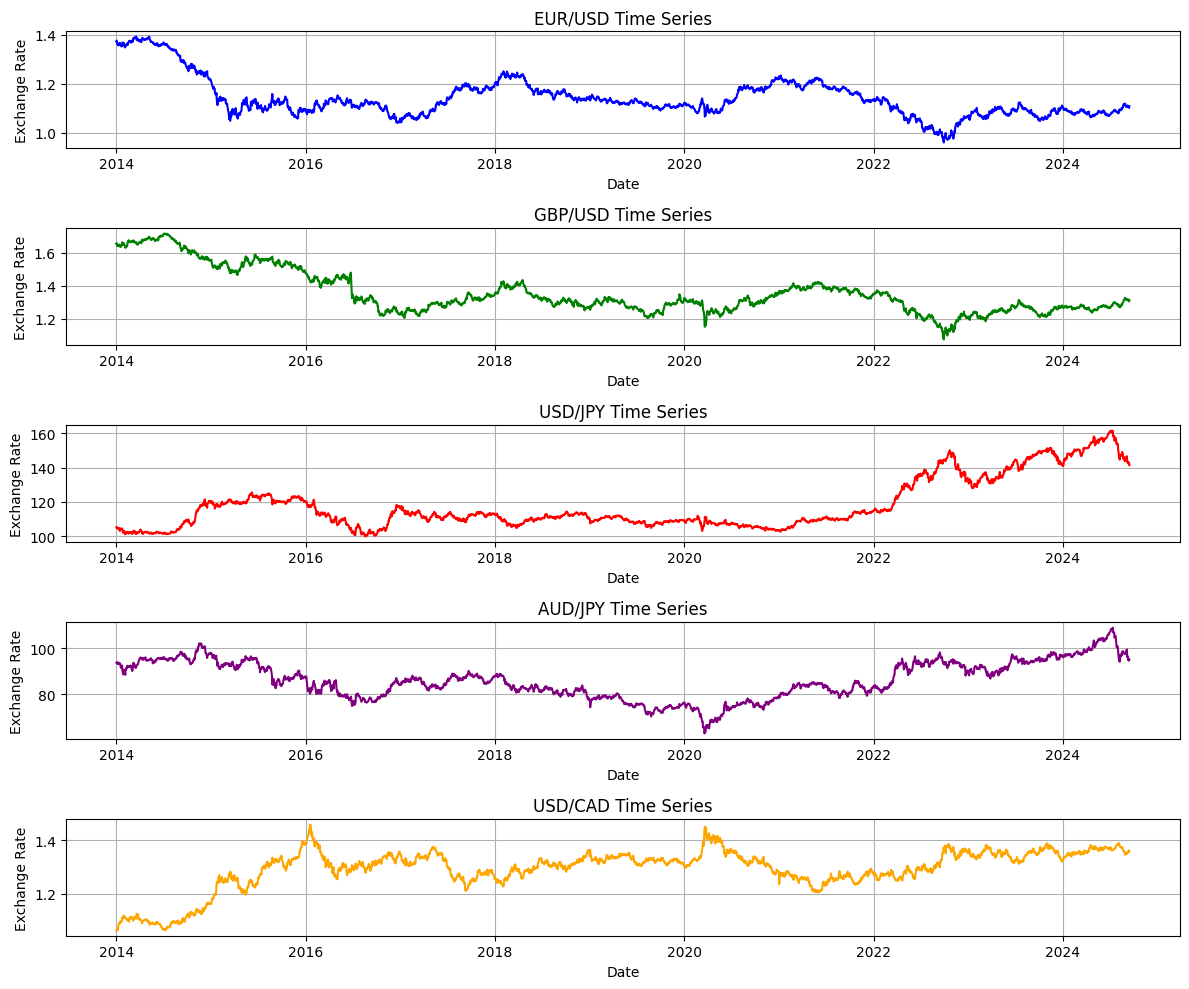

In [4]:
# Plotting the currencies
plt.figure(figsize=(12, 10))

# Plot 1: EUR/USD
plt.subplot(5, 1, 1)
plt.plot(curr_data.index, curr_data['EUR/USD'], label='EUR/USD', color='blue')
plt.title('EUR/USD Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Plot 2: GBP/USD
plt.subplot(5, 1, 2)
plt.plot(curr_data.index, curr_data['GBP/USD'], label='GBP/USD', color='green')
plt.title('GBP/USD Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Plot 3: USD/JPY
plt.subplot(5, 1, 3)
plt.plot(curr_data.index, curr_data['USD/JPY'], label='USD/JPY', color='red')
plt.title('USD/JPY Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Plot 4: AUD/JPY
plt.subplot(5, 1, 4)
plt.plot(curr_data.index, curr_data['AUD/JPY'], label='AUD/JPY', color='purple')
plt.title('AUD/JPY Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Plot 5: USD/CAD
plt.subplot(5, 1, 5)
plt.plot(curr_data.index, curr_data['USD/CAD'], label='USD/CAD', color='orange')
plt.title('USD/CAD Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Time Series Plots of the Stock Prices

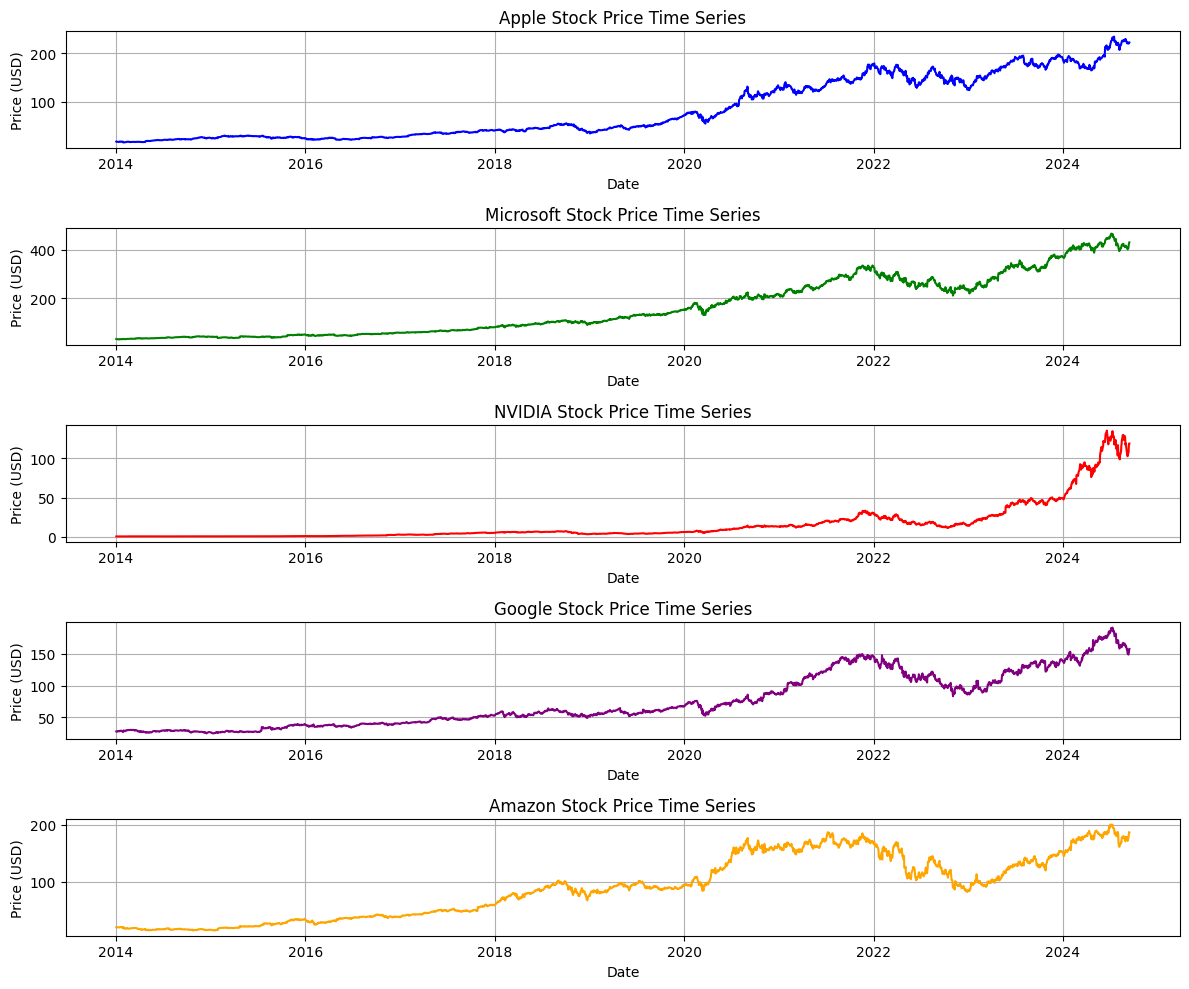

In [5]:
# Plotting the stocks
plt.figure(figsize=(12, 10))

# Plot 1: Apple
plt.subplot(5, 1, 1)
plt.plot(stock_data.index, stock_data['AAPL'], label='Apple', color='blue')
plt.title('Apple Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Plot 2: Microsoft
plt.subplot(5, 1, 2)
plt.plot(stock_data.index, stock_data['MSFT'], label='Microsoft', color='green')
plt.title('Microsoft Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Plot 3: NVIDIA
plt.subplot(5, 1, 3)
plt.plot(stock_data.index, stock_data['NVDA'], label='NVIDIA', color='red')
plt.title('NVIDIA Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Plot 4: Google
plt.subplot(5, 1, 4)
plt.plot(stock_data.index, stock_data['GOOGL'], label='Google', color='purple')
plt.title('Google Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Plot 5: Amazon
plt.subplot(5, 1, 5)
plt.plot(stock_data.index, stock_data['AMZN'], label='Amazon', color='orange')
plt.title('Amazon Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Currency Pairs Correlation Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_13040\531147222.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  curr_returns = curr_data.pct_change().dropna()


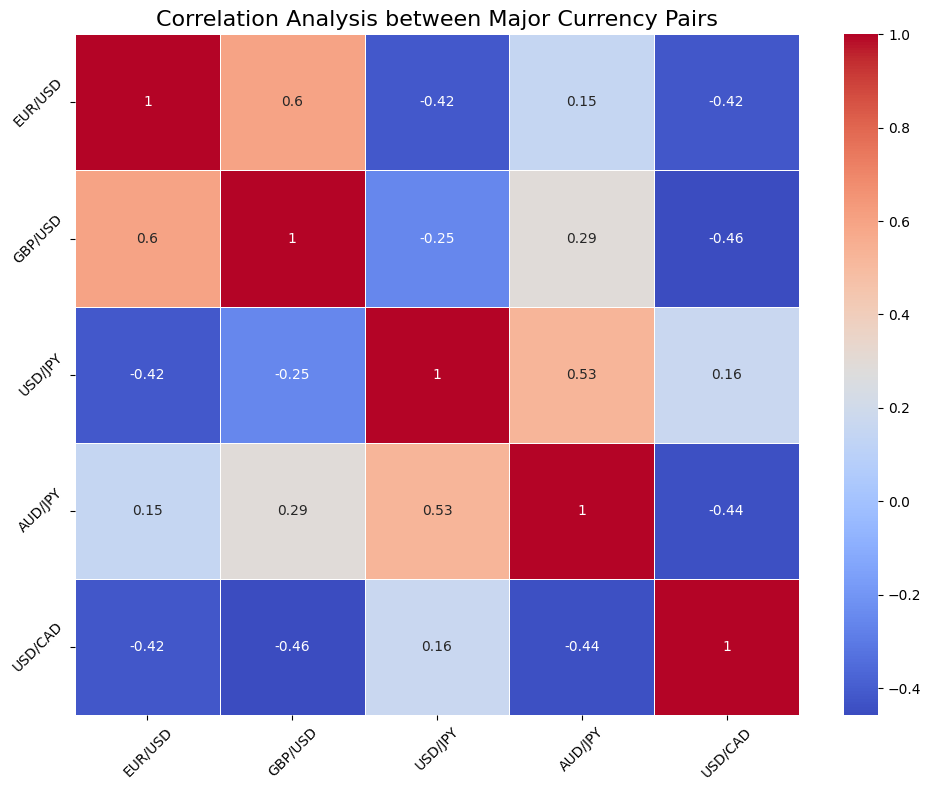

In [6]:
# Calculating Currency Pairs Returns to conduct correlation analysis
curr_returns = curr_data.pct_change().dropna()
corr_matrix = curr_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis between Major Currency Pairs', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Stock Data Correlation Analysis

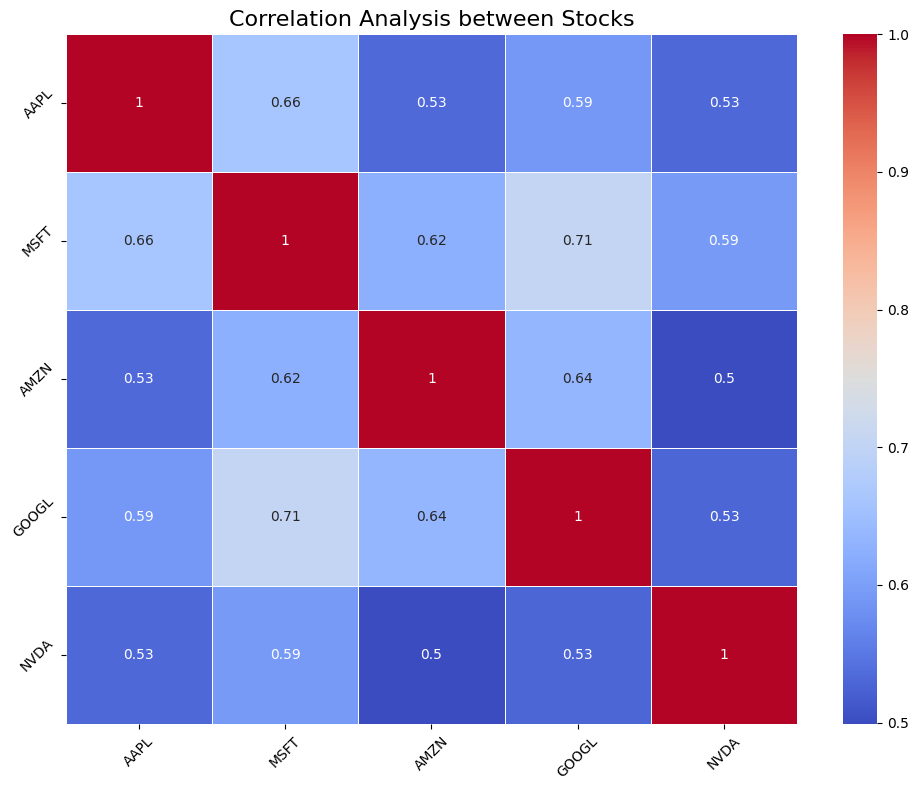

In [7]:
# Calculating Stock Data Returns to conduct correlation analysis
stock_returns = stock_data.pct_change().dropna()
corr_matrix = stock_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis between Stocks', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## FORECASTING

### Defining Data

In [8]:
df=curr_data.copy()
df1=stock_data.copy()

### 1. Prophet Model
##### a) Currency Forecasts

Running Prophet for EUR/USD...


20:35:22 - cmdstanpy - INFO - Chain [1] start processing
20:35:25 - cmdstanpy - INFO - Chain [1] done processing


EUR/USD - RMSE: 0.0175, MAE: 0.0135


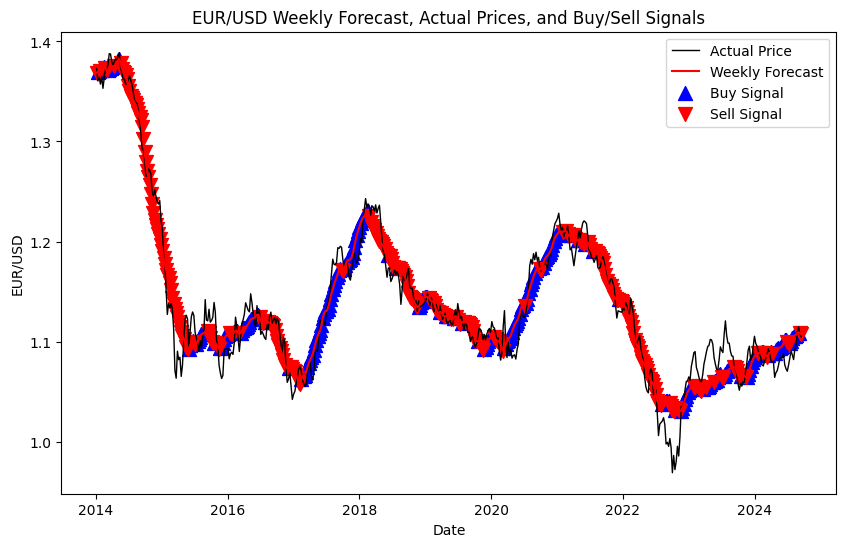

Running Prophet for GBP/USD...


20:35:27 - cmdstanpy - INFO - Chain [1] start processing
20:35:29 - cmdstanpy - INFO - Chain [1] done processing


GBP/USD - RMSE: 0.0228, MAE: 0.0177


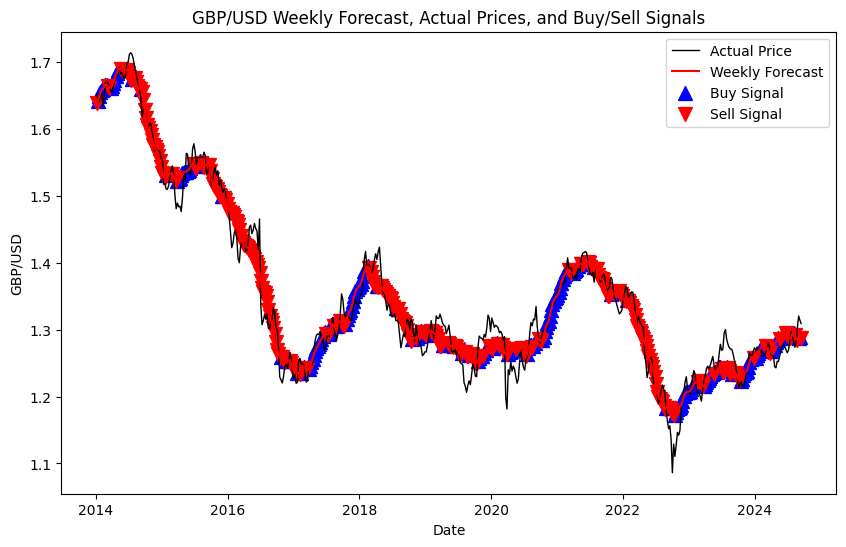

Running Prophet for USD/JPY...


20:35:30 - cmdstanpy - INFO - Chain [1] start processing
20:35:33 - cmdstanpy - INFO - Chain [1] done processing


USD/JPY - RMSE: 2.6973, MAE: 1.9416


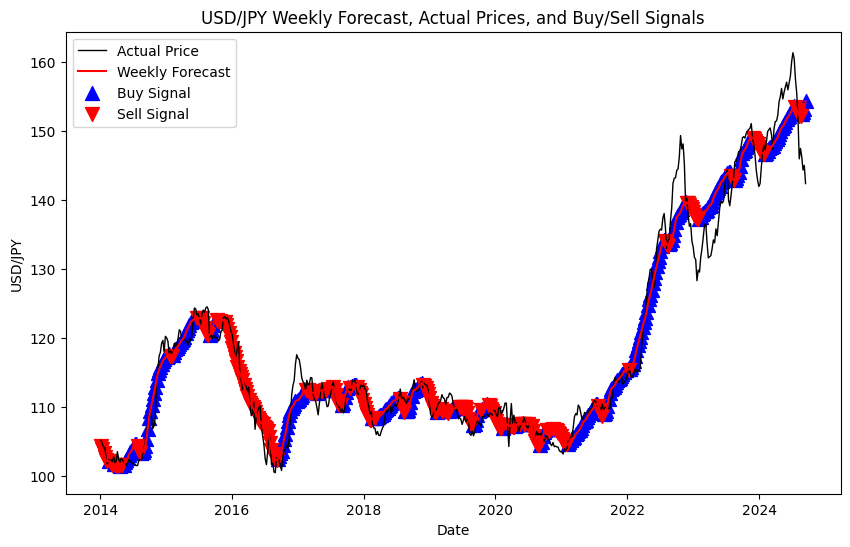

Running Prophet for AUD/JPY...


20:35:35 - cmdstanpy - INFO - Chain [1] start processing
20:35:36 - cmdstanpy - INFO - Chain [1] done processing


AUD/JPY - RMSE: 2.2165, MAE: 1.7775


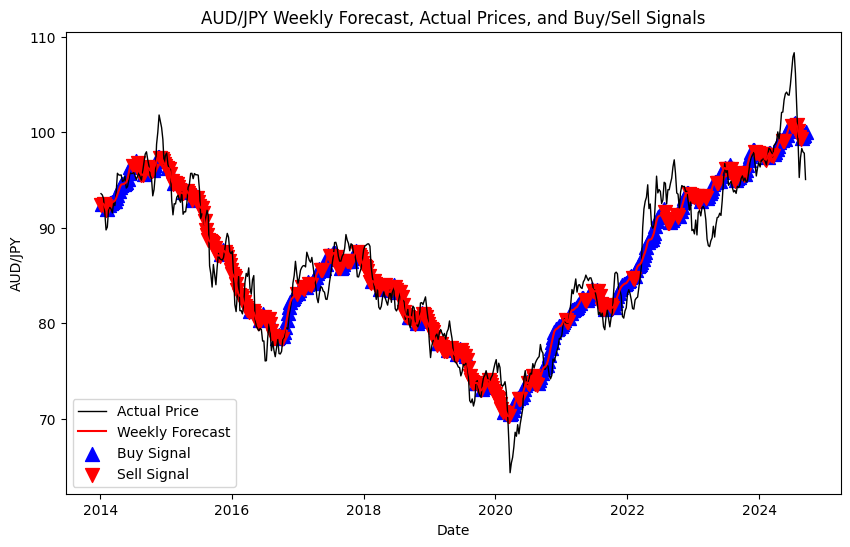

Running Prophet for USD/CAD...


20:35:38 - cmdstanpy - INFO - Chain [1] start processing
20:35:40 - cmdstanpy - INFO - Chain [1] done processing


USD/CAD - RMSE: 0.0188, MAE: 0.0147


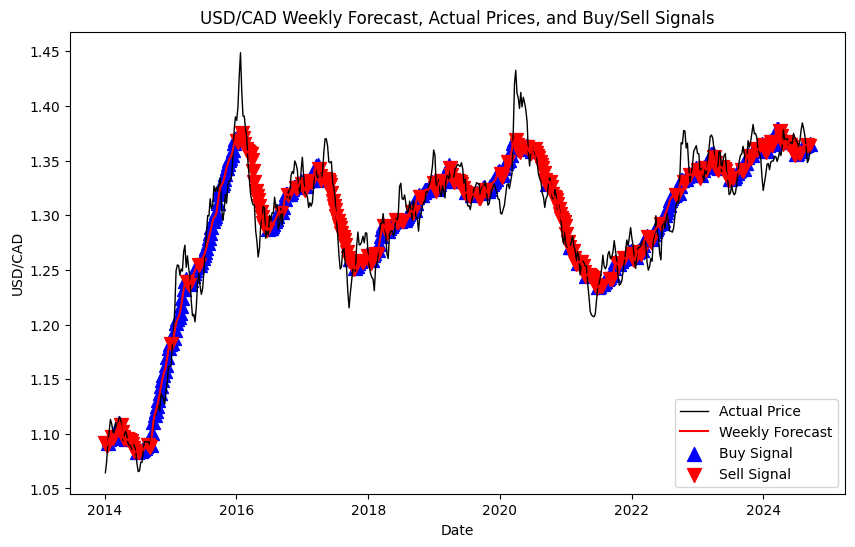

In [11]:
# Preparing data for the 5 trading currency pairs
currency_pairs = df.columns
results = []

# Looping through each currency pair
for pair in currency_pairs:
    print(f"Running Prophet for {pair}...")
    
    
    prophet_data = df[[pair]].reset_index().rename(columns={'Date': 'ds', pair: 'y'})

    
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )

    model.add_seasonality(name='monthly', period=30.5, fourier_order=10)
    model.fit(prophet_data)

    
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Resample the forecast to weekly frequency (average weekly forecast)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast.set_index('ds', inplace=True)

    # Resample actual data to weekly
    actual_weekly_data = df[[pair]].resample('W').mean()  

    # Resample the forecasted data to match the actual weekly data
    weekly_forecast = forecast[['yhat']].resample('W').mean()
    weekly_forecast = weekly_forecast.loc[actual_weekly_data.index]

    # Calculating RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actual_weekly_data[pair], weekly_forecast['yhat']))
    mae = mean_absolute_error(actual_weekly_data[pair], weekly_forecast['yhat'])
    
    print(f"{pair} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    # Generating Weekly Signal
    weekly_forecast['price_change'] = weekly_forecast['yhat'].pct_change()
    weekly_forecast['signal'] = np.where(weekly_forecast['price_change'] > 0, 1, 0)

    # Plotting Actual closing prices and the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(actual_weekly_data.index, actual_weekly_data[pair], label='Actual Price', color='black', linewidth=1)
    plt.plot(weekly_forecast.index, weekly_forecast['yhat'], label='Weekly Forecast', color='red')
    
    # Scatter plot for signals
    buy_signals = weekly_forecast[weekly_forecast['signal'] == 1]
    sell_signals = weekly_forecast[weekly_forecast['signal'] == 0]

    # Plotting Signals
    plt.scatter(buy_signals.index, buy_signals['yhat'], color='blue', label='Buy Signal', marker='^', s=100)  
    plt.scatter(sell_signals.index, sell_signals['yhat'], color='red', label='Sell Signal', marker='v', s=100)  

    plt.title(f'{pair} Weekly Forecast, Actual Prices, and Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel(pair)
    plt.legend()
    plt.show()




##### Stock Forecast

Running Prophet for AAPL...


20:39:37 - cmdstanpy - INFO - Chain [1] start processing
20:39:38 - cmdstanpy - INFO - Chain [1] done processing


AAPL - RMSE: 7.0018, MAE: 5.0850


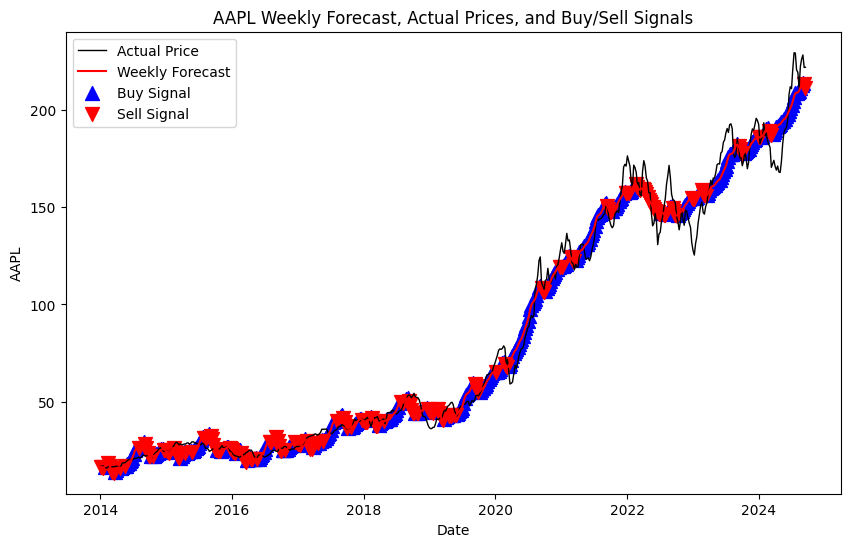

Running Prophet for MSFT...


20:39:40 - cmdstanpy - INFO - Chain [1] start processing
20:39:42 - cmdstanpy - INFO - Chain [1] done processing


MSFT - RMSE: 10.9765, MAE: 7.2734


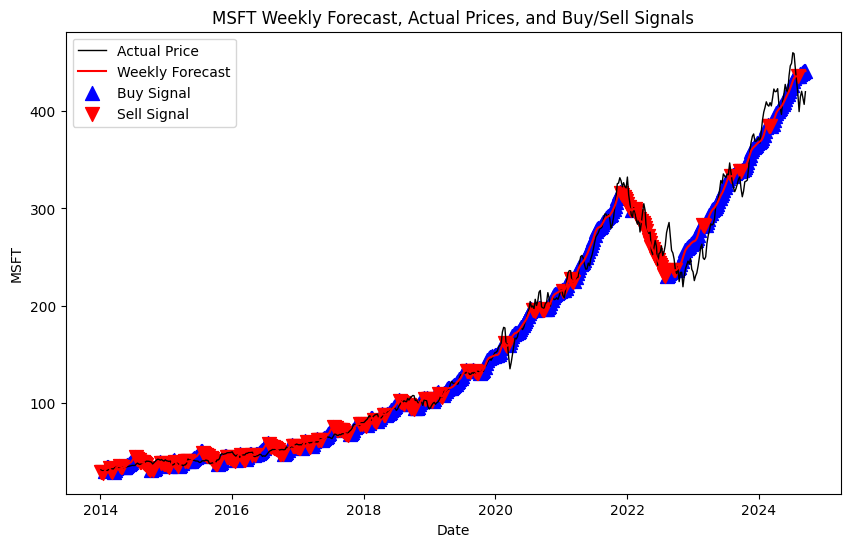

Running Prophet for AMZN...


20:39:44 - cmdstanpy - INFO - Chain [1] start processing
20:39:45 - cmdstanpy - INFO - Chain [1] done processing


AMZN - RMSE: 8.7348, MAE: 6.1067


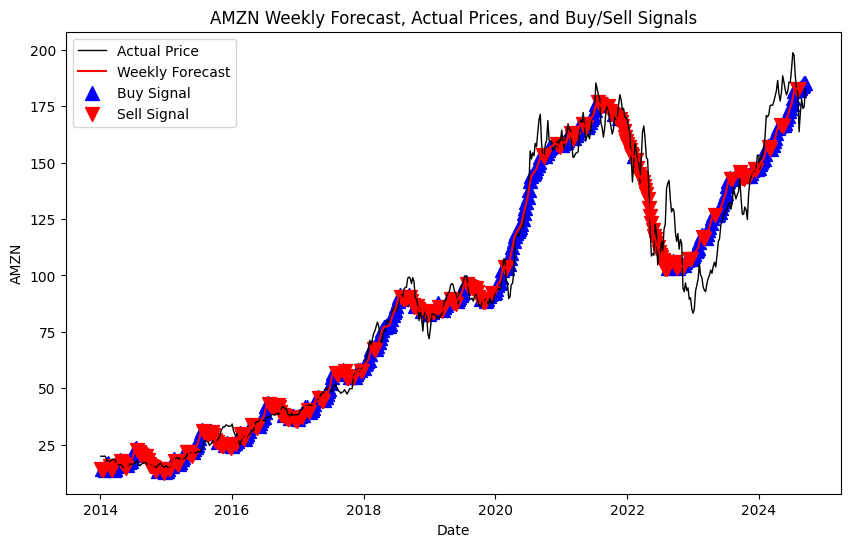

Running Prophet for GOOGL...


20:39:47 - cmdstanpy - INFO - Chain [1] start processing
20:39:49 - cmdstanpy - INFO - Chain [1] done processing


GOOGL - RMSE: 5.6751, MAE: 3.8805


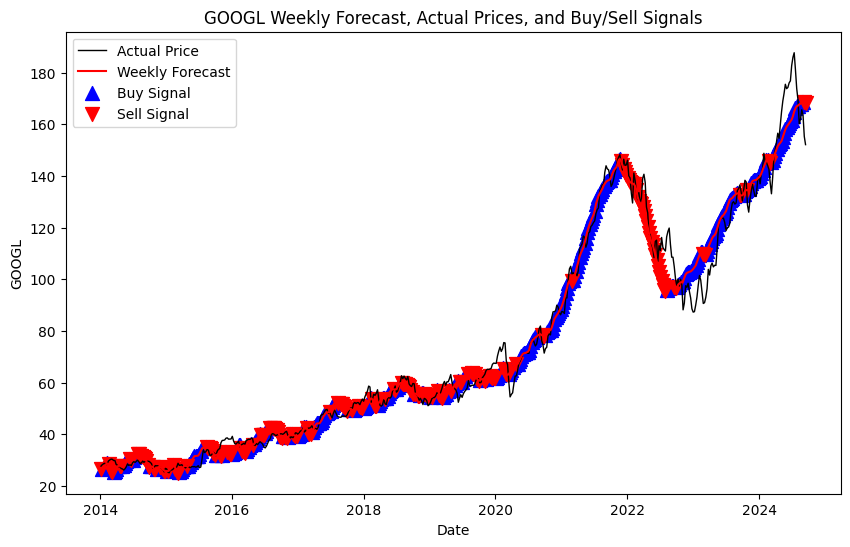

Running Prophet for NVDA...


20:39:50 - cmdstanpy - INFO - Chain [1] start processing
20:39:52 - cmdstanpy - INFO - Chain [1] done processing


NVDA - RMSE: 5.8892, MAE: 3.6017


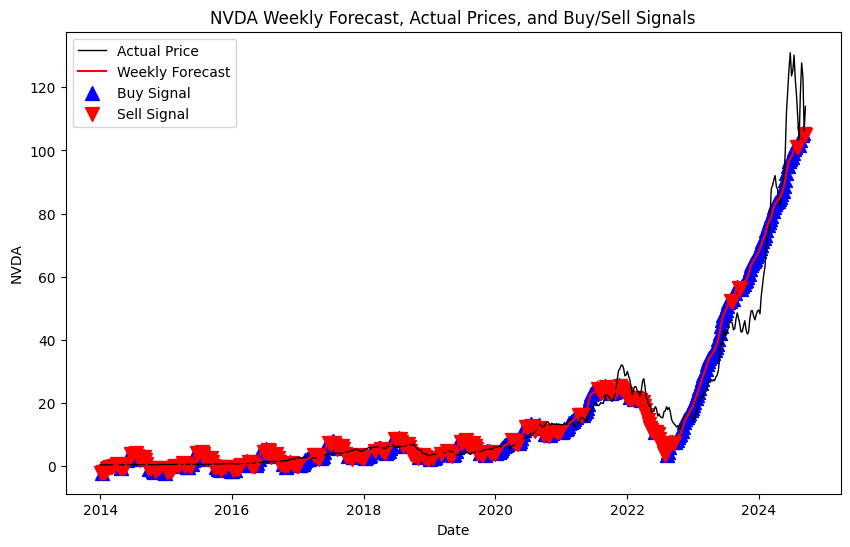

In [13]:
# Preparing stocks stocks
stocks = df1.columns
results = []

# Looping through each currency pair
for pair in stocks:
    print(f"Running Prophet for {pair}...")
    
    
    prophet_data = df1[[pair]].reset_index().rename(columns={'Date': 'ds', pair: 'y'})

    
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )

    model.add_seasonality(name='monthly', period=30.5, fourier_order=10)
    model.fit(prophet_data)

    
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Resample the forecast to weekly frequency (average weekly forecast)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast.set_index('ds', inplace=True)

    # Resample actual data to weekly
    actual_weekly_data = df1[[pair]].resample('W').mean()  

    # Resample the forecasted data to match the actual weekly data
    weekly_forecast = forecast[['yhat']].resample('W').mean()
    weekly_forecast = weekly_forecast.loc[actual_weekly_data.index]

    # Calculating RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actual_weekly_data[pair], weekly_forecast['yhat']))
    mae = mean_absolute_error(actual_weekly_data[pair], weekly_forecast['yhat'])
    
    print(f"{pair} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    # Generating Weekly Signal
    weekly_forecast['price_change'] = weekly_forecast['yhat'].pct_change()
    weekly_forecast['signal'] = np.where(weekly_forecast['price_change'] > 0, 1, 0)

    # Plotting Actual closing prices and the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(actual_weekly_data.index, actual_weekly_data[pair], label='Actual Price', color='black', linewidth=1)
    plt.plot(weekly_forecast.index, weekly_forecast['yhat'], label='Weekly Forecast', color='red')
    
    # Scatter plot for signals
    buy_signals = weekly_forecast[weekly_forecast['signal'] == 1]
    sell_signals = weekly_forecast[weekly_forecast['signal'] == 0]

    # Plotting Signals
    plt.scatter(buy_signals.index, buy_signals['yhat'], color='blue', label='Buy Signal', marker='^', s=100)  
    plt.scatter(sell_signals.index, sell_signals['yhat'], color='red', label='Sell Signal', marker='v', s=100)  

    plt.title(f'{pair} Weekly Forecast, Actual Prices, and Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel(pair)
    plt.legend()
    plt.show()




## XGBoost Model

##### Currency forecast

Running XGBoost for EUR/USD...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13040\2691714364.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Return'] = data['Close'].pct_change()


EUR/USD - Train RMSE: 0.0037, Train MAE: 0.0028
EUR/USD - Test RMSE: 0.0171, Test MAE: 0.0089


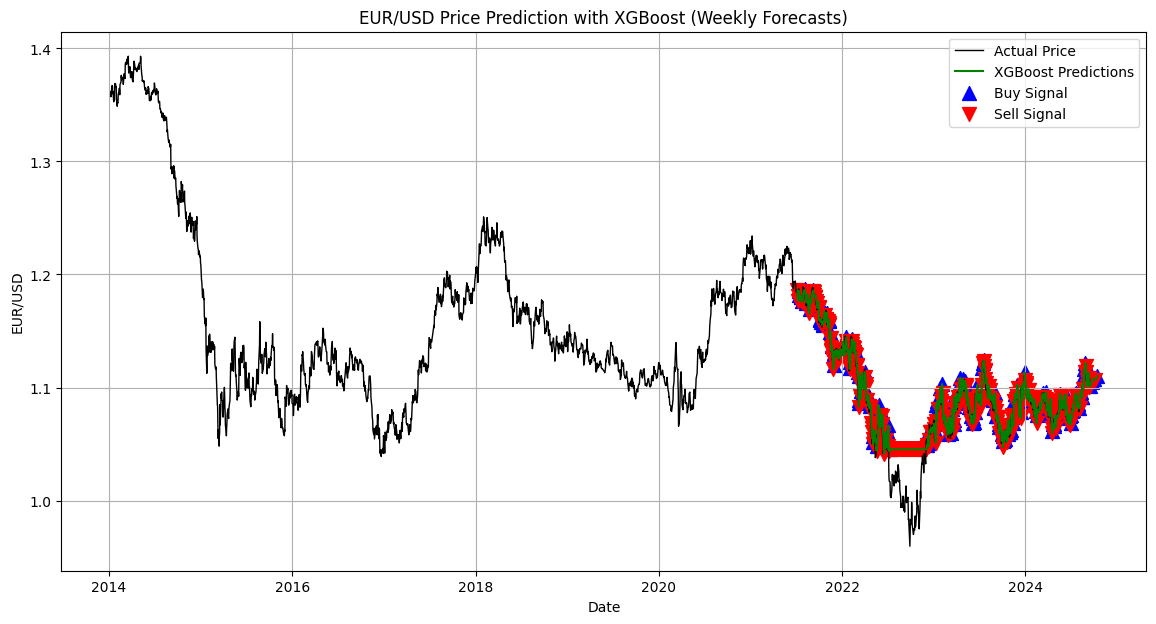

Running XGBoost for GBP/USD...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13040\2691714364.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Return'] = data['Close'].pct_change()


GBP/USD - Train RMSE: 0.0050, Train MAE: 0.0038
GBP/USD - Test RMSE: 0.0194, Test MAE: 0.0095


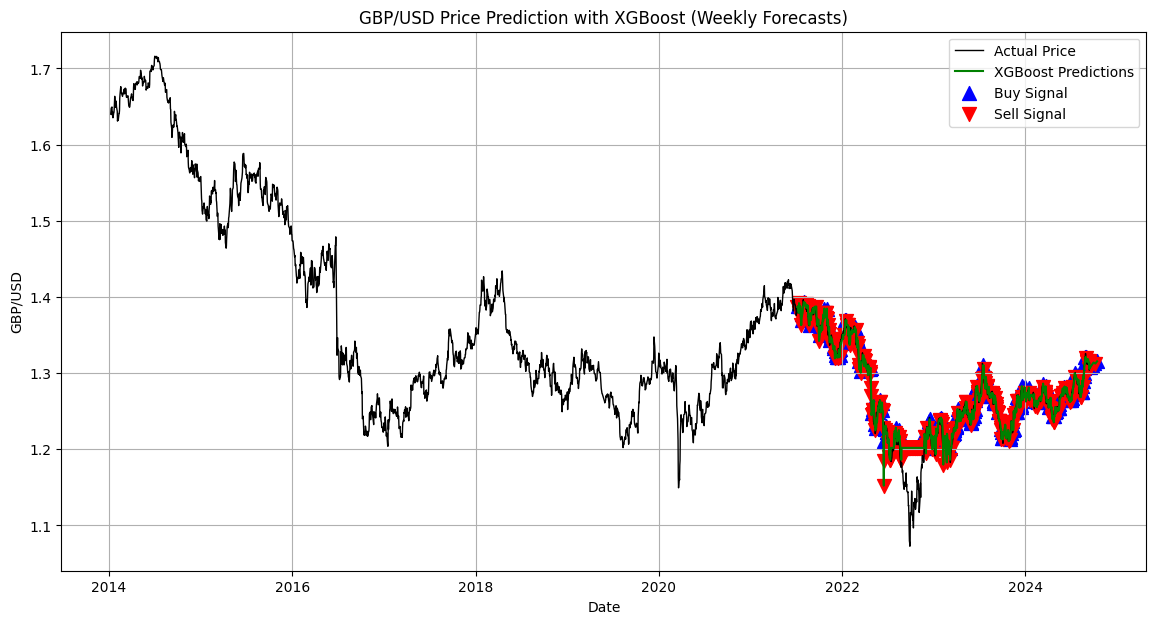

Running XGBoost for USD/JPY...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13040\2691714364.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Return'] = data['Close'].pct_change()


USD/JPY - Train RMSE: 0.3514, Train MAE: 0.2623
USD/JPY - Test RMSE: 17.6899, Test MAE: 14.0765


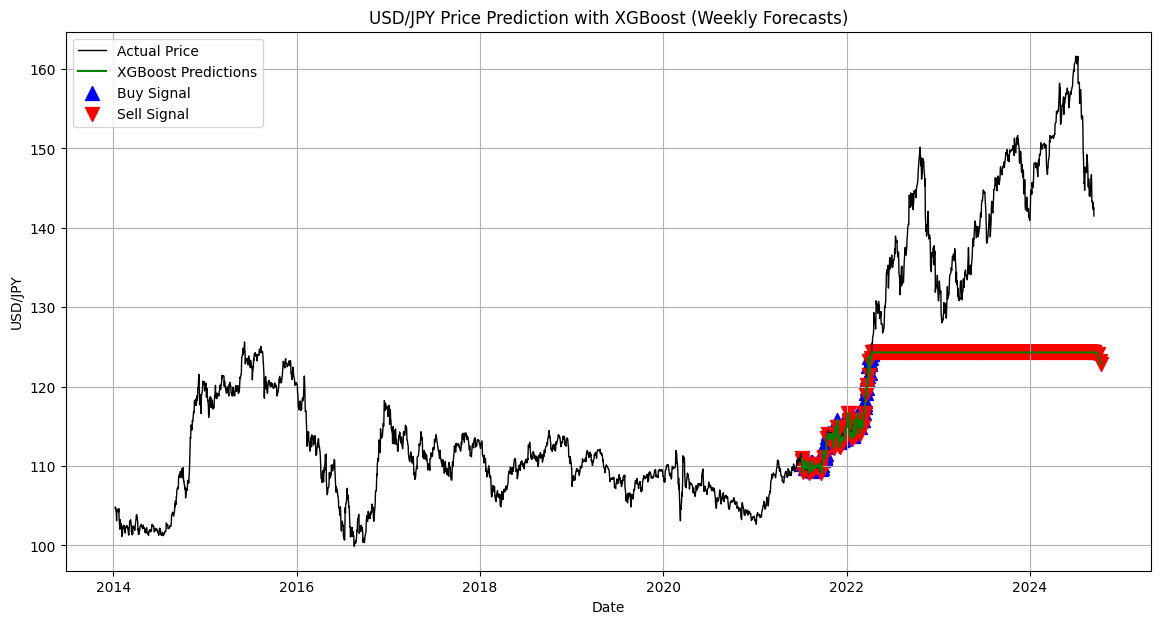

Running XGBoost for AUD/JPY...
AUD/JPY - Train RMSE: 0.3778, Train MAE: 0.2862
AUD/JPY - Test RMSE: 1.2471, Test MAE: 0.7589


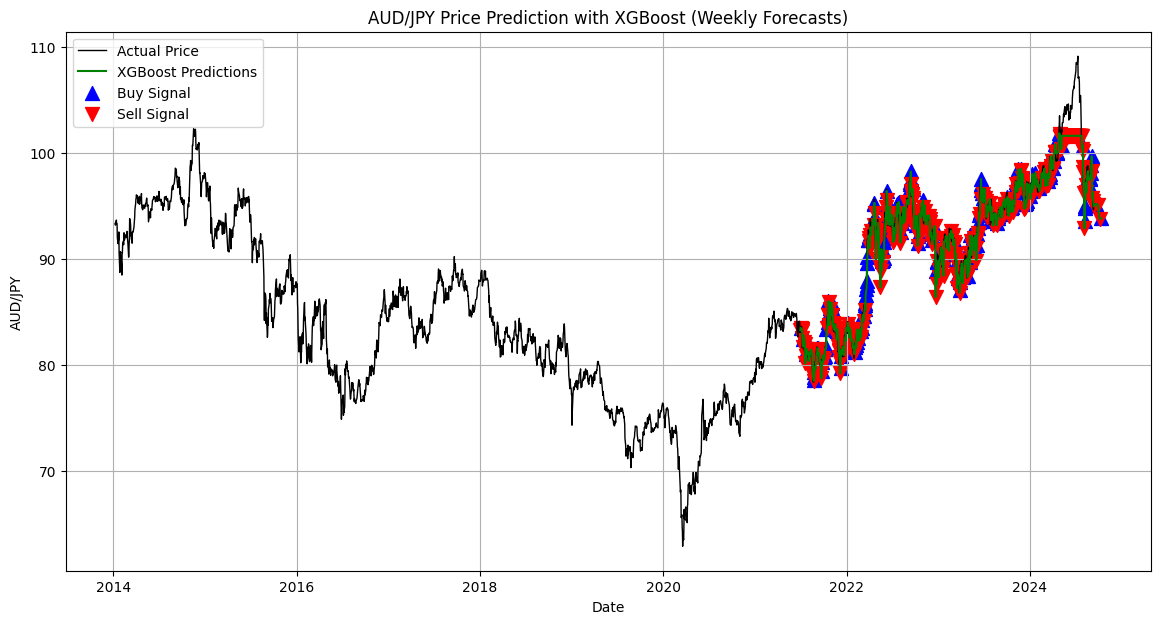

Running XGBoost for USD/CAD...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13040\2691714364.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Return'] = data['Close'].pct_change()


USD/CAD - Train RMSE: 0.0040, Train MAE: 0.0031
USD/CAD - Test RMSE: 0.0059, Test MAE: 0.0046


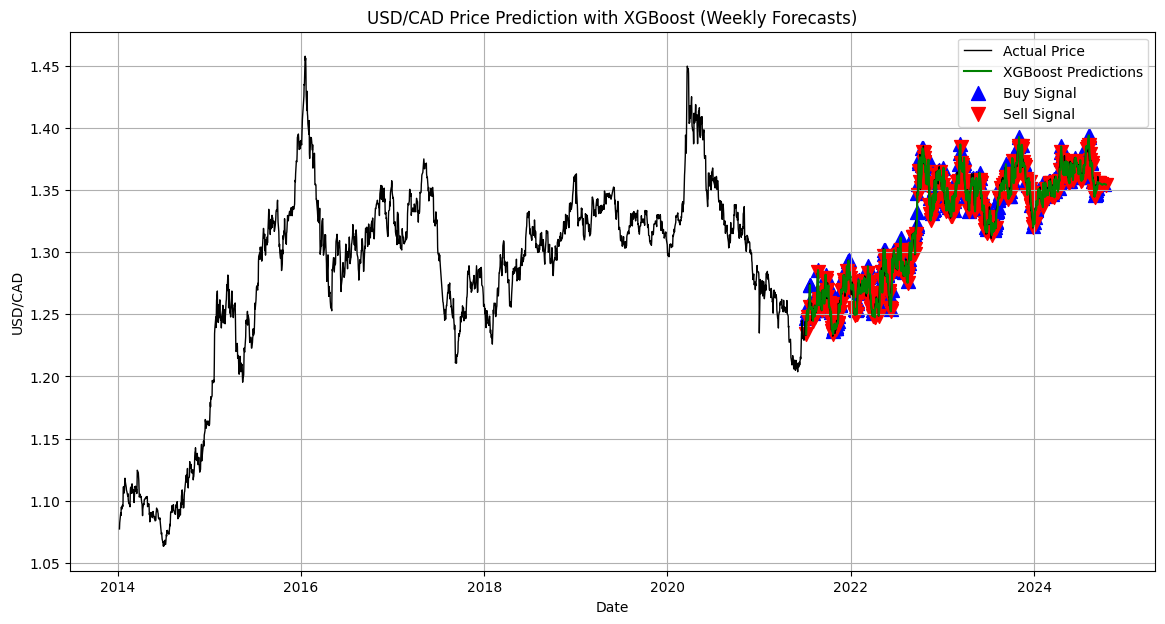

In [16]:
currency_pairs = df.columns

# Looping through each currency pair
for pair in currency_pairs:
    print(f"Running XGBoost for {pair}...")
    data = df[[pair]].reset_index()
    data.columns = ['Date', 'Close']
    
    
    data['Return'] = data['Close'].pct_change()
    for lag in range(1, 6):  # Create lagged features from Lag1 to Lag5
        data[f'Lag{lag}'] = data['Close'].shift(lag)
    data = data.dropna()

    # Features and target variable
    features = [f'Lag{lag}' for lag in range(1, 6)]
    X = data[features]
    y = data['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

    # Train the XGBoost model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"{pair} - Train RMSE: {train_rmse:.4f}, Train MAE: {train_mae:.4f}")
    print(f"{pair} - Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

    # Prepare for visualization
    data['Predicted'] = np.nan
    data.iloc[len(X_train):len(X_train) + len(y_test), data.columns.get_loc('Predicted')] = y_test_pred

    # Forecasting for the next 30 days (weekly)
    last_data = data[features].iloc[-1].values.reshape(1, -1)
    predictions = []

    for _ in range(30):  # Predicting for 30 days
        next_prediction = model.predict(last_data)[0]
        predictions.append(next_prediction)

        # Update last_data for the next prediction
        last_data = np.roll(last_data, -1)  
        last_data[0, -1] = next_prediction  

    # Create a DataFrame for predictions
    predicted_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
    predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted': predictions})

    # Resampling to weekly predictions
    predicted_df.set_index('Date', inplace=True)
    predicted_df = predicted_df.resample('W').mean()  # Take weekly mean
    predicted_df.reset_index(inplace=True)

    # Generate signals for the full predicted period
    full_data = pd.concat([data[['Date', 'Close', 'Predicted']], predicted_df], ignore_index=True)
    full_data['Signal'] = np.where(full_data['Predicted'].pct_change() > 0, 1, 0)  # Buy signal (1) if price increases, otherwise (0)

    # Prepare signals for plotting
    buy_signals = full_data[full_data['Signal'] == 1]
    sell_signals = full_data[full_data['Signal'] == 0]

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(full_data['Date'], full_data['Close'], label='Actual Price', color='black', linewidth=1)
    plt.plot(full_data['Date'], full_data['Predicted'], label='XGBoost Predictions', color='green')
    plt.scatter(buy_signals['Date'], buy_signals['Predicted'], color='blue', label='Buy Signal', marker='^', s=100)
    plt.scatter(sell_signals['Date'], sell_signals['Predicted'], color='red', label='Sell Signal', marker='v', s=100)
    plt.title(f'{pair} Price Prediction with XGBoost (Weekly Forecasts)')
    plt.xlabel('Date')
    plt.ylabel(pair)
    plt.legend()
    plt.grid()
    plt.show()



##### Stock forecast

Running XGBoost for AAPL...
AAPL - Train RMSE: 0.6306, Train MAE: 0.4028
AAPL - Test RMSE: 42.7100, Test MAE: 35.7979


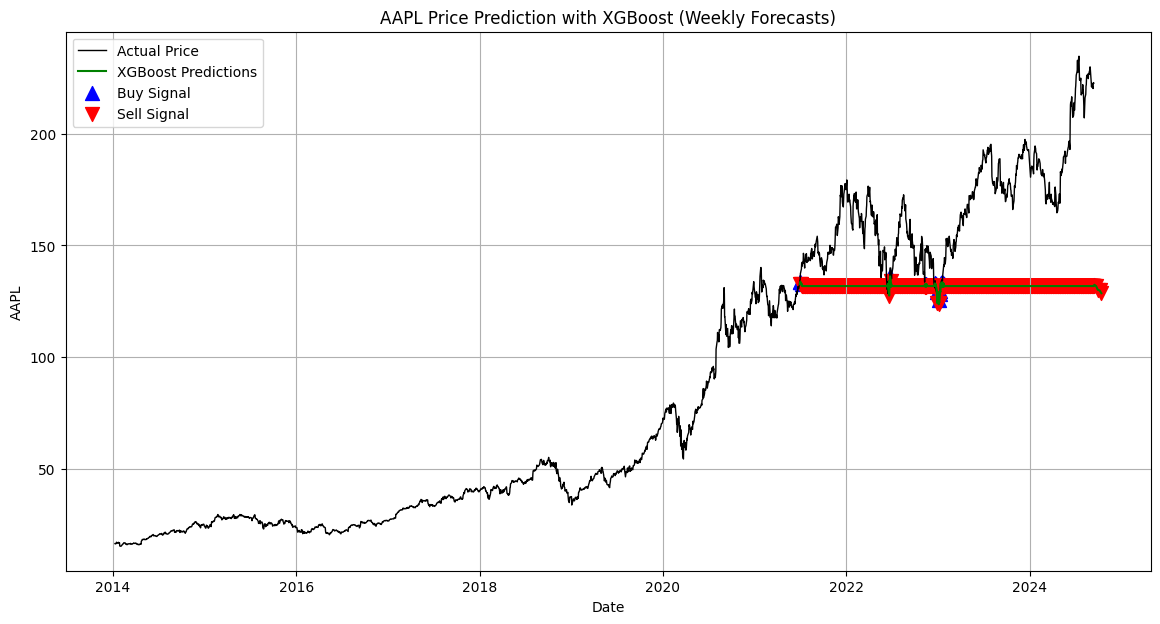

Running XGBoost for MSFT...
MSFT - Train RMSE: 1.0718, Train MAE: 0.7050
MSFT - Test RMSE: 83.6558, Test MAE: 60.8584


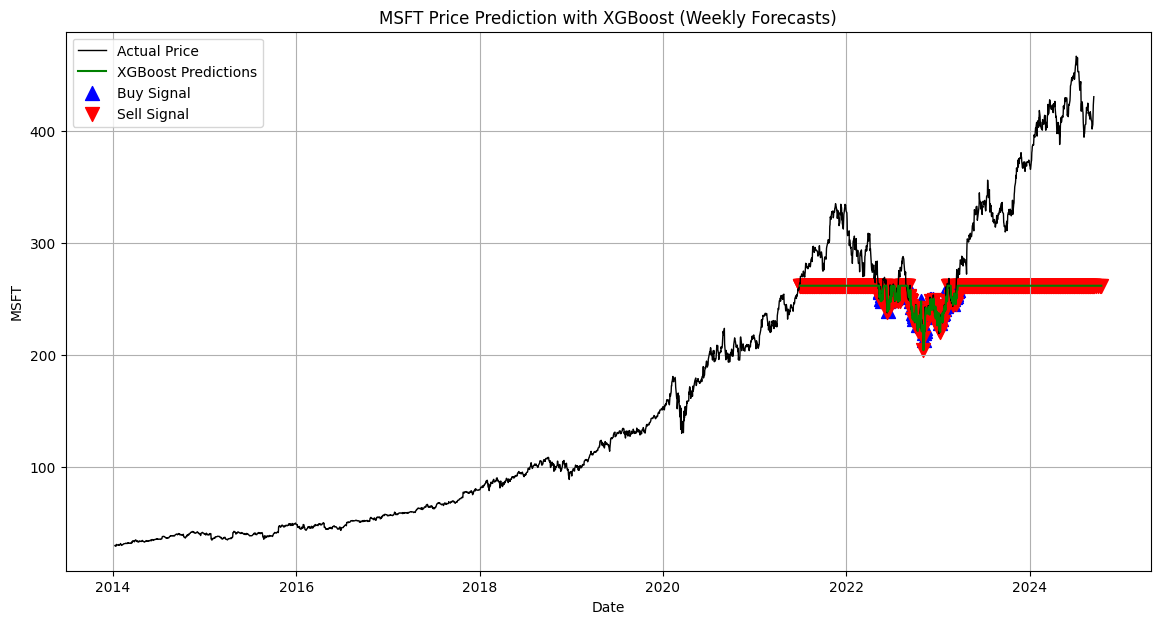

Running XGBoost for AMZN...
AMZN - Train RMSE: 0.9092, Train MAE: 0.5825
AMZN - Test RMSE: 7.0611, Test MAE: 4.9959


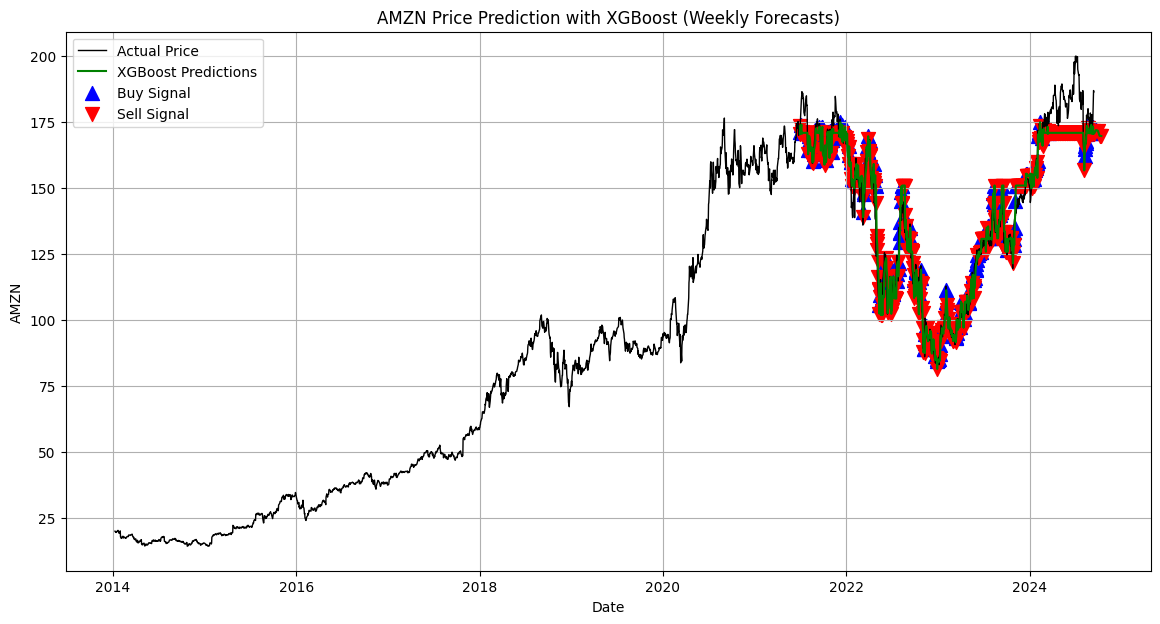

Running XGBoost for GOOGL...
GOOGL - Train RMSE: 0.5660, Train MAE: 0.3903
GOOGL - Test RMSE: 21.5404, Test MAE: 14.8245


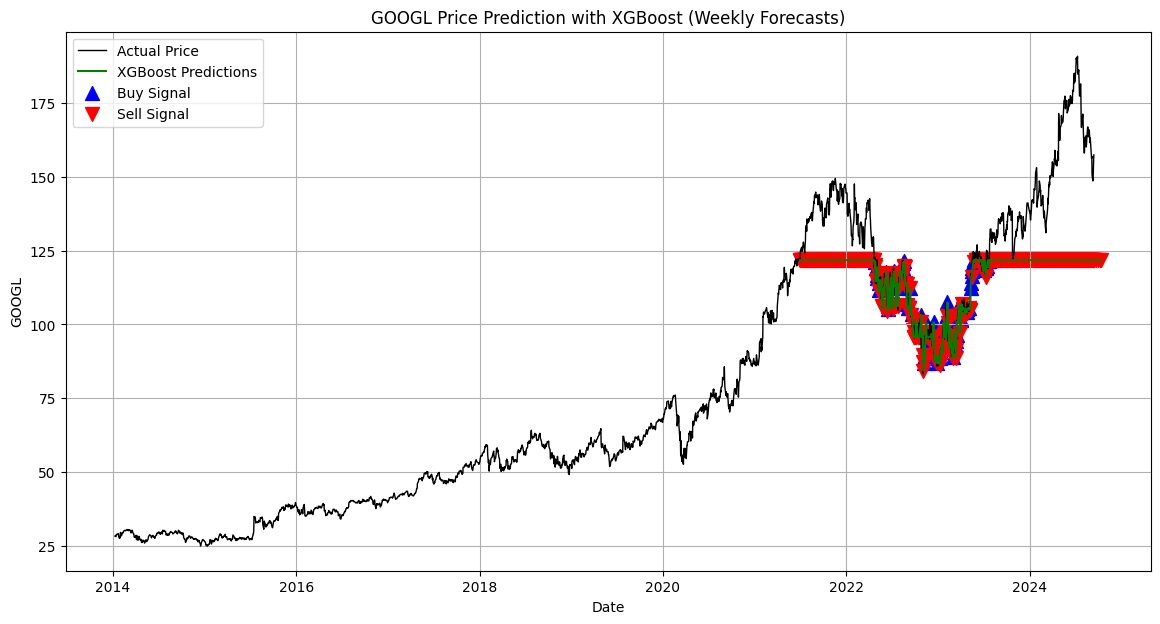

Running XGBoost for NVDA...
NVDA - Train RMSE: 0.0934, Train MAE: 0.0545
NVDA - Test RMSE: 39.5443, Test MAE: 23.8151


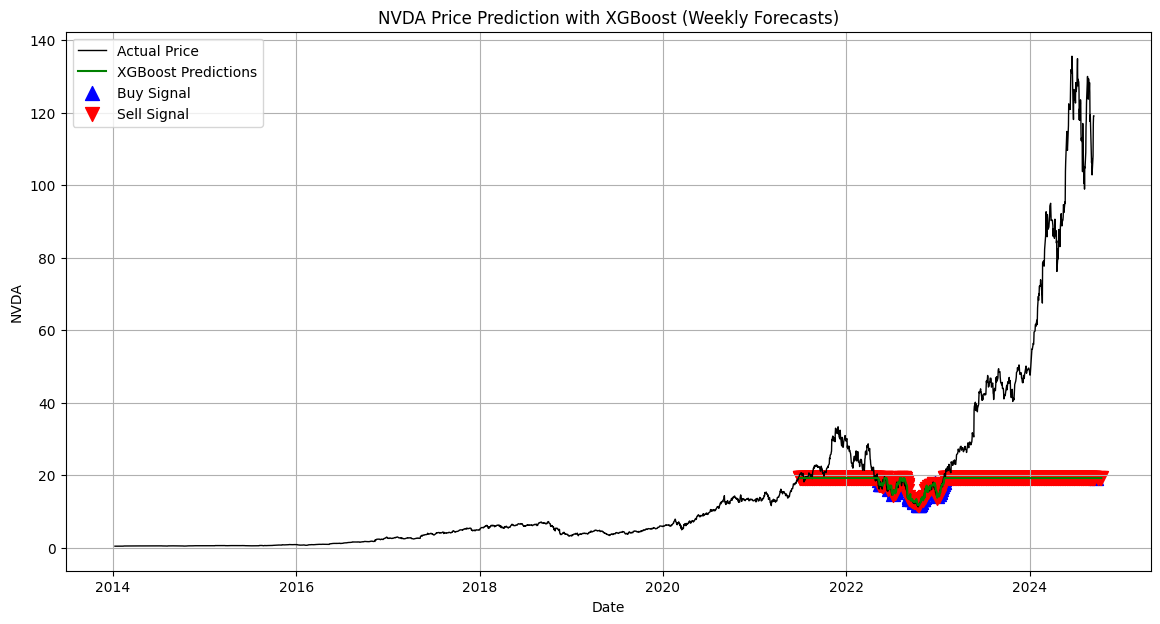

In [17]:
stock = df1.columns

# Looping through the data
for pair in stock:
    print(f"Running XGBoost for {pair}...")
    data = df1[[pair]].reset_index()
    data.columns = ['Date', 'Close']
    
    data['Return'] = data['Close'].pct_change()
    for lag in range(1, 6):  
        data[f'Lag{lag}'] = data['Close'].shift(lag)
    data = data.dropna()

    # Features and target variable
    features = [f'Lag{lag}' for lag in range(1, 6)]
    X = data[features]
    y = data['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

    # Train the XGBoost model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"{pair} - Train RMSE: {train_rmse:.4f}, Train MAE: {train_mae:.4f}")
    print(f"{pair} - Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

    # Prepare for visualization
    data['Predicted'] = np.nan
    data.iloc[len(X_train):len(X_train) + len(y_test), data.columns.get_loc('Predicted')] = y_test_pred

    # Forecasting for the next 30 days (weekly)
    last_data = data[features].iloc[-1].values.reshape(1, -1)
    predictions = []

    for _ in range(30):  # Predicting for 30 days
        next_prediction = model.predict(last_data)[0]
        predictions.append(next_prediction)

        # Update last_data for the next prediction
        last_data = np.roll(last_data, -1)  
        last_data[0, -1] = next_prediction  

    # Create a DataFrame for predictions
    predicted_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
    predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted': predictions})

    # Resampling to weekly predictions
    predicted_df.set_index('Date', inplace=True)
    predicted_df = predicted_df.resample('W').mean()  # Take weekly mean
    predicted_df.reset_index(inplace=True)

    # Generate signals for the full predicted period
    full_data = pd.concat([data[['Date', 'Close', 'Predicted']], predicted_df], ignore_index=True)
    full_data['Signal'] = np.where(full_data['Predicted'].pct_change() > 0, 1, 0)  # Buy signal (1) if price increases, otherwise (0)

    # Prepare signals for plotting
    buy_signals = full_data[full_data['Signal'] == 1]
    sell_signals = full_data[full_data['Signal'] == 0]

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(full_data['Date'], full_data['Close'], label='Actual Price', color='black', linewidth=1)
    plt.plot(full_data['Date'], full_data['Predicted'], label='XGBoost Predictions', color='green')
    plt.scatter(buy_signals['Date'], buy_signals['Predicted'], color='blue', label='Buy Signal', marker='^', s=100)
    plt.scatter(sell_signals['Date'], sell_signals['Predicted'], color='red', label='Sell Signal', marker='v', s=100)
    plt.title(f'{pair} Price Prediction with XGBoost (Weekly Forecasts)')
    plt.xlabel('Date')
    plt.ylabel(pair)
    plt.legend()
    plt.grid()
    plt.show()



## CNN-LSTM Hybrid Model
##### a) Currency forecast

Processing EURUSD=X...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0590 - val_loss: 0.0019
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 7.4791e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5535e-04 - val_loss: 6.1583e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.7468e-04 - val_loss: 6.1675e-04
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6288e-04 - val_loss: 5.8689e-04
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1083e-04 - val_loss: 5.5946e-04
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3873e-04 - val_loss: 5.5230e-04
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9678e-04 - val_loss: 5.1947e-04
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1633e-04 - val_loss: 5.0361e-04
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5394e-04 - val_loss: 5.1341e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
EURUSD=X Train RMSE: 0

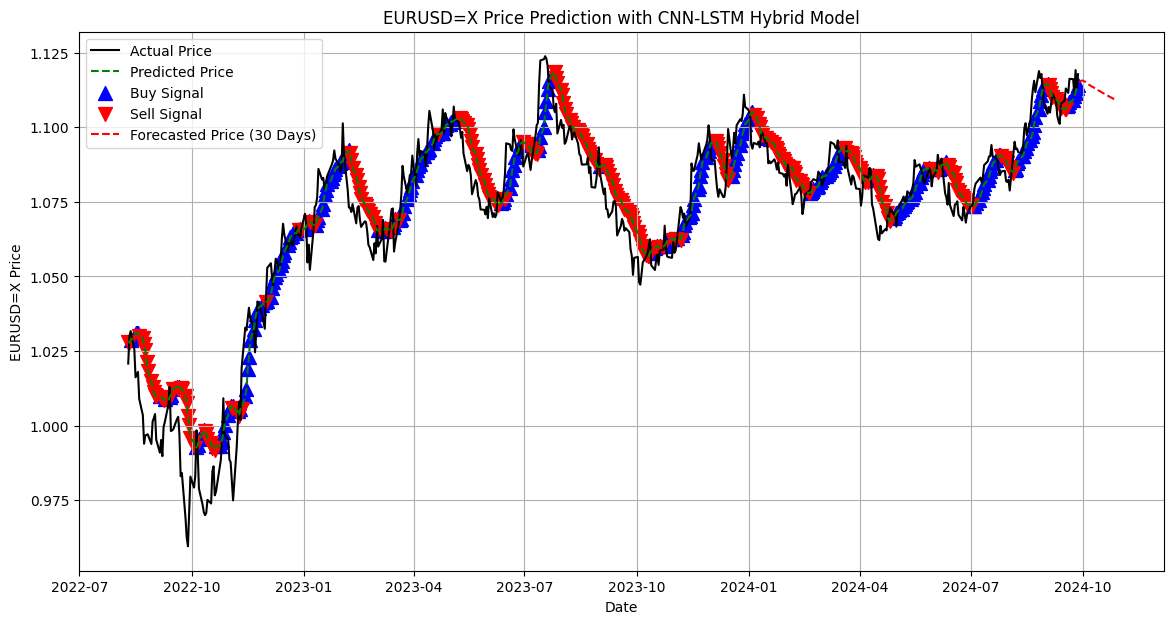

Processing GBPUSD=X...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0693 - val_loss: 0.0013
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3749e-04 - val_loss: 4.7181e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9115e-04 - val_loss: 4.9952e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5793e-04 - val_loss: 5.0322e-04
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8433e-04 - val_loss: 4.5558e-04
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3722e-04 - val_loss: 4.6790e-04
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3788e-04 - val_loss: 4.2509e-04
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8985e-04 - val_loss: 4.2790e-04
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3415e-04 - val_loss: 4.1336e-04
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1152e-04 - val_loss: 4.0649e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
GBPUSD=X Train RMSE

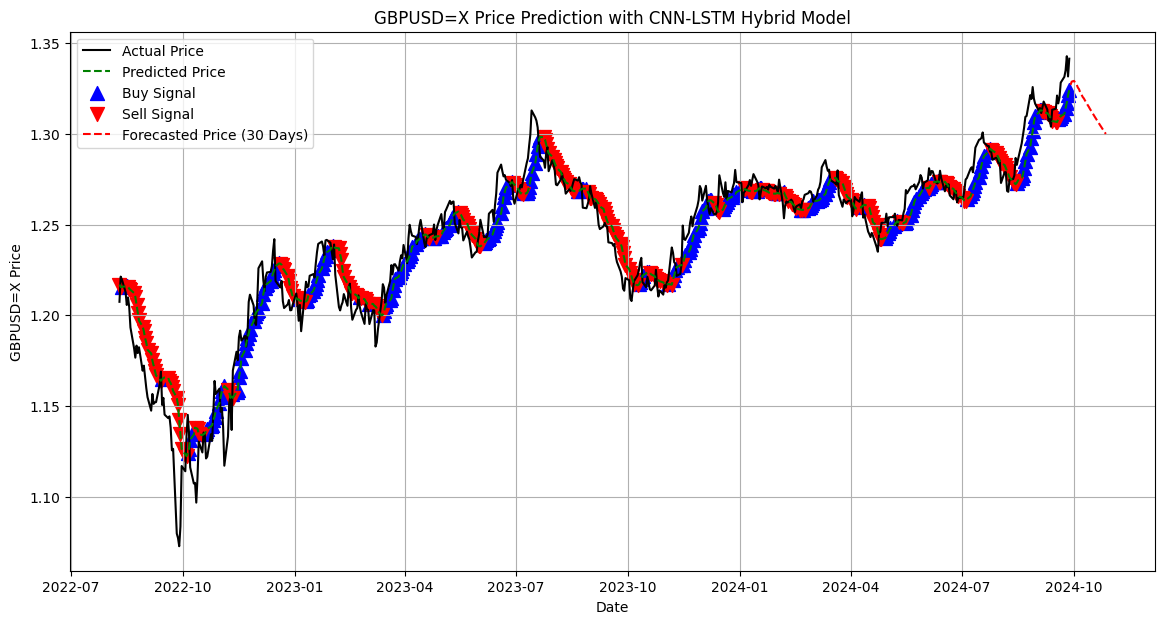

Processing USDJPY=X...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0143 - val_loss: 0.0051
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2525e-04 - val_loss: 0.0027
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6059e-04 - val_loss: 0.0013
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3587e-04 - val_loss: 0.0022
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5045e-04 - val_loss: 0.0033
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3798e-04 - val_loss: 9.7582e-04
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1557e-04 - val_loss: 8.6250e-04
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9398e-04 - val_loss: 0.0015
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1755e-04 - val_loss: 0.0010
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8352e-04 - val_loss: 8.0069e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
USDJPY=X Train RMSE: 1.0255, Train MAE: 0.7

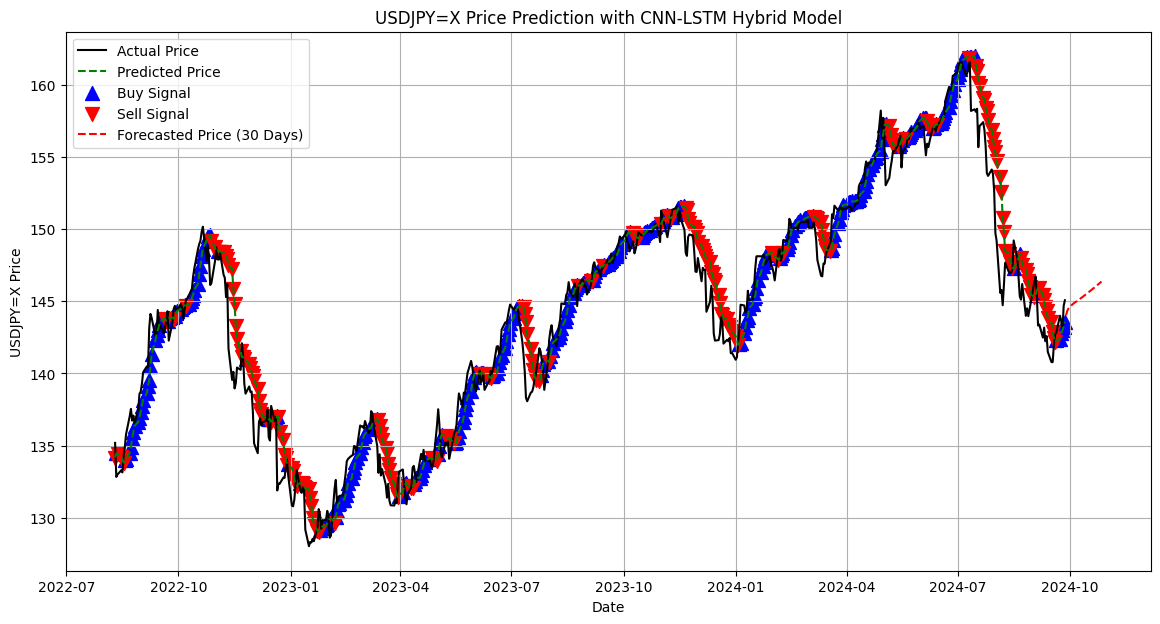

Processing AUDJPY=X...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0502 - val_loss: 7.5189e-04
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1170e-04 - val_loss: 8.3992e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4103e-04 - val_loss: 7.2144e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6981e-04 - val_loss: 6.7157e-04
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9232e-04 - val_loss: 6.4712e-04
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1543e-04 - val_loss: 0.0014
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0363e-04 - val_loss: 6.7682e-04
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1732e-04 - val_loss: 6.9094e-04
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8388e-04 - val_loss: 8.2649e-04
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0120e-04 - val_loss: 7.5318e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUDJPY=X Train RMSE

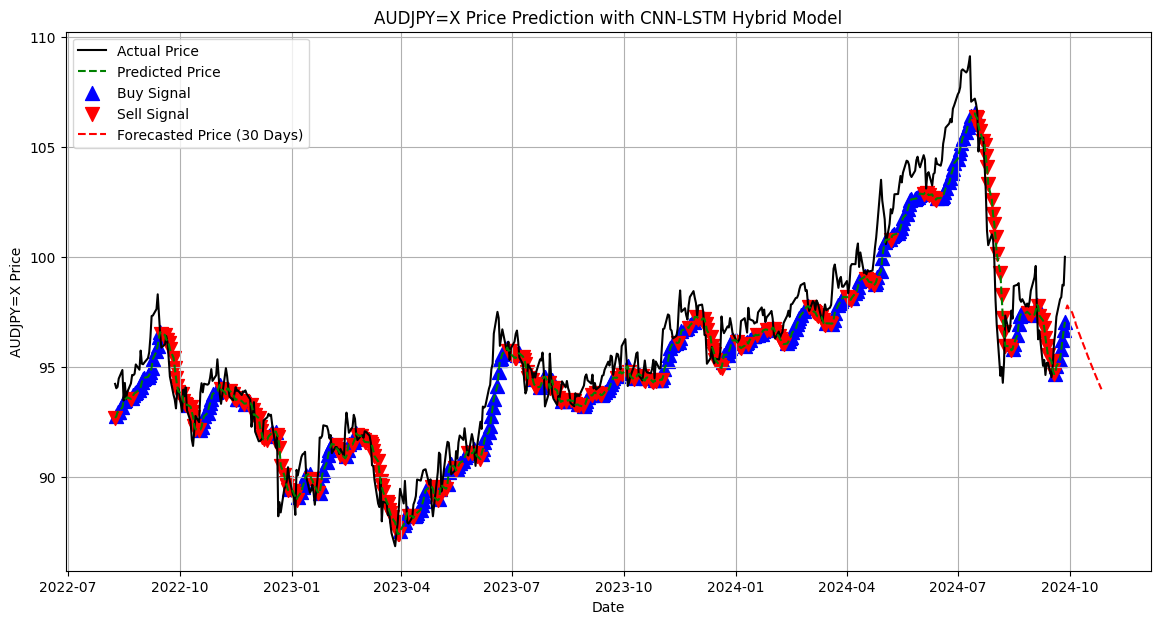

Processing USDCAD=X...


[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1204 - val_loss: 7.8202e-04
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 5.8293e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9900e-04 - val_loss: 5.6932e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.8470e-04 - val_loss: 5.8351e-04
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6897e-04 - val_loss: 5.3598e-04
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4442e-04 - val_loss: 5.2900e-04
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1893e-04 - val_loss: 5.2520e-04
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4006e-04 - val_loss: 5.1601e-04
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7044e-04 - val_loss: 5.1396e-04
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.6498e-04 - val_loss: 5.1124e-04
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
USDCAD=X

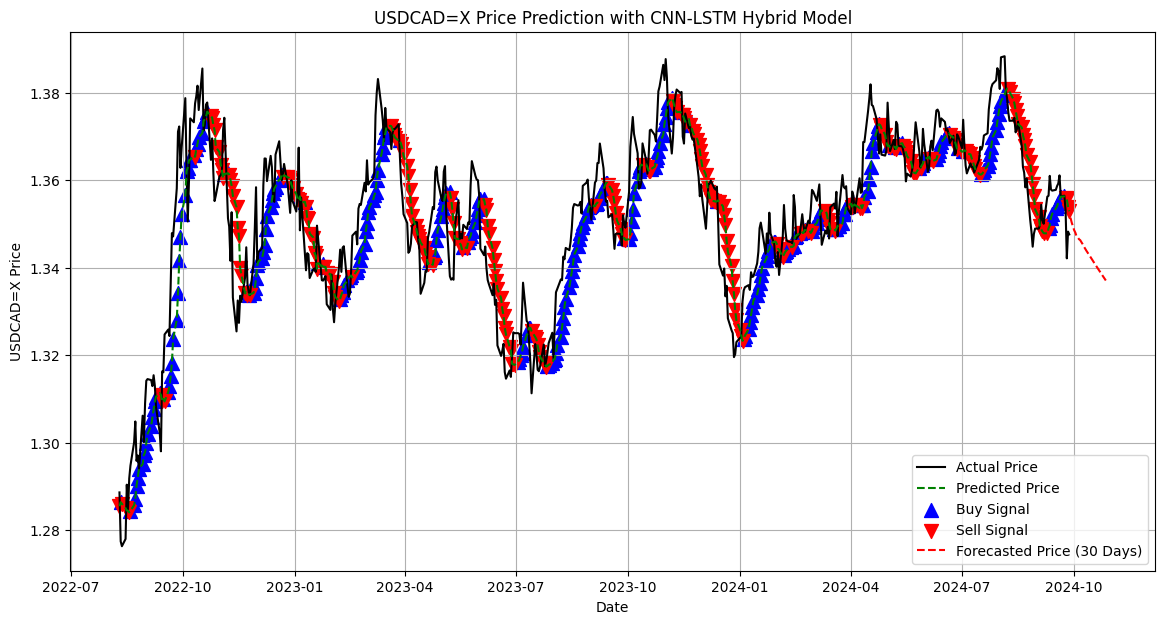

In [20]:
# List of currency pairs to loop through
currency_pairs = ["EURUSD=X", "GBPUSD=X", "USDJPY=X", "AUDJPY=X", "USDCAD=X"]

# Function to process each currency pair
def process_currency_pair(pair):
    print(f"Processing {pair}...")

    
    start_date = "2014-01-01"
    end_date = "2024-09-30"
    data = yf.download(pair, start=start_date, end=end_date)
    data = data.reset_index()

    # Prepare the data
    data['Return'] = data['Close'].pct_change().dropna()

    # Feature Scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    seq_length = 10  
    X, y = create_sequences(scaled_data, seq_length)

    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

   
    model = Sequential()

    # CNN Layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM Layer 
    model.add(LSTM(units=50, return_sequences=False))  
    model.add(Dense(1))   
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

   
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Inverse scale the predictions and actual data
    y_train_pred_rescaled = scaler.inverse_transform(y_train_pred)
    y_test_pred_rescaled = scaler.inverse_transform(y_test_pred)
    y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculating RMSE and MAE
    train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
    test_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
    train_mae = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
    test_mae = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)

    print(f"{pair} Train RMSE: {train_rmse:.4f}, Train MAE: {train_mae:.4f}")
    print(f"{pair} Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

    # DataFrame for actual vs predicted values
    test_dates = data['Date'].iloc[len(y_train) + seq_length:].reset_index(drop=True)
    comparison_df = pd.DataFrame({'Date': test_dates, 
                                  'Actual Price': y_test_rescaled.flatten(), 
                                  'Predicted Price': y_test_pred_rescaled.flatten()})

    
    comparison_df['Signal'] = np.where(comparison_df['Predicted Price'].diff() > 0, 'Buy', 'Sell')

   
    last_sequence = scaled_data[-seq_length:] 
    forecast = []

    for _ in range(30):  # Predicting 30 days ahead
        last_sequence = last_sequence.reshape((1, seq_length, 1))
        next_prediction = model.predict(last_sequence)[0, 0]
        forecast.append(next_prediction)

        # Update the sequence with the new prediction
        last_sequence = np.append(last_sequence.flatten()[1:], next_prediction)
        last_sequence = last_sequence.reshape((seq_length, 1))

    # Inverse scale the forecasted values
    forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

    
    predicted_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
    predicted_df = pd.DataFrame({'Date': predicted_dates, 'Forecasted Price': forecast_rescaled.flatten()})

    # Plotting actual vs predicted prices and forecast
    plt.figure(figsize=(14, 7))

    # Plotting the actual prices and the predicted prices
    plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label='Actual Price', color='black')
    plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Price', color='green', linestyle='--')

    # Plotting the buy/sell signals
    buy_signals = comparison_df[comparison_df['Signal'] == 'Buy']
    sell_signals = comparison_df[comparison_df['Signal'] == 'Sell']
    plt.scatter(buy_signals['Date'], buy_signals['Predicted Price'], marker='^', color='blue', label='Buy Signal', s=100)
    plt.scatter(sell_signals['Date'], sell_signals['Predicted Price'], marker='v', color='red', label='Sell Signal', s=100)

    # Plotting forecasted prices
    plt.plot(predicted_df['Date'], predicted_df['Forecasted Price'], label='Forecasted Price (30 Days)', color='red', linestyle='--')

   
    plt.title(f'{pair} Price Prediction with CNN-LSTM Hybrid Model')
    plt.xlabel('Date')
    plt.ylabel(f'{pair} Price')
    plt.legend()
    plt.grid()
    plt.show()

    
    comparison_df.tail(20)

# Loop through each currency pair
for pair in currency_pairs:
    process_currency_pair(pair)


##### b) Stocks forecasting

Processing AAPL...


[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0138 - val_loss: 6.0053e-04
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8131e-04 - val_loss: 5.9050e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7958e-04 - val_loss: 6.4964e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9305e-04 - val_loss: 7.2269e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9974e-04 - val_loss: 5.8458e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7325e-04 - val_loss: 7.2465e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6091e-04 - val_loss: 7.3516e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5770e-04 - val_loss: 5.7753e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6607e-04 - val_loss: 9.5170e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5656e-04 - val_loss: 5.9587e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AAPL

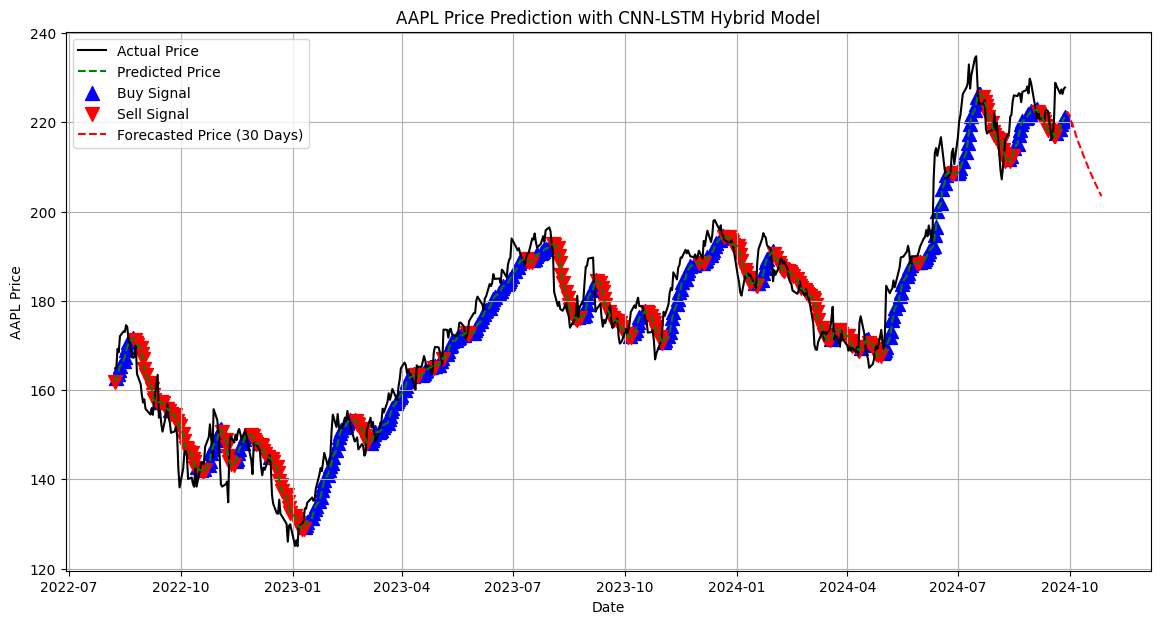

Processing MSFT...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0268 - val_loss: 0.0011
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0414e-04 - val_loss: 5.1110e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7082e-04 - val_loss: 5.1365e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3788e-04 - val_loss: 5.0258e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3648e-04 - val_loss: 5.9713e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3249e-04 - val_loss: 6.0931e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1247e-04 - val_loss: 9.3831e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3205e-04 - val_loss: 6.4949e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2997e-04 - val_loss: 6.0165e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2348e-04 - val_loss: 5.6971e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSFT Train RMSE: 4

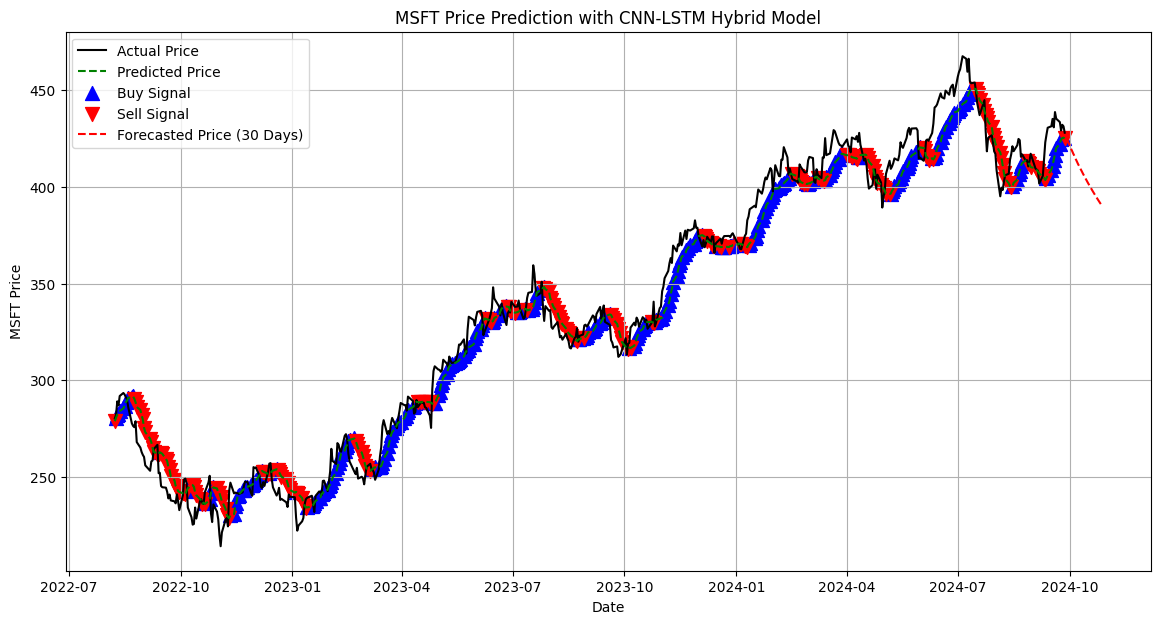

Processing NVDA...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4204e-05 - val_loss: 0.0016
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2904e-05 - val_loss: 0.0019
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4971e-05 - val_loss: 0.0015
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7400e-05 - val_loss: 0.0015
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5766e-05 - val_loss: 0.0010
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3327e-05 - val_loss: 0.0019
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4992e-05 - val_loss: 0.0016
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2420e-05 - val_loss: 0.0010
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0137e-05 - val_loss: 0.0012
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
NVDA Train RMSE: 0.6222, Train MAE: 0.3093
NVDA T

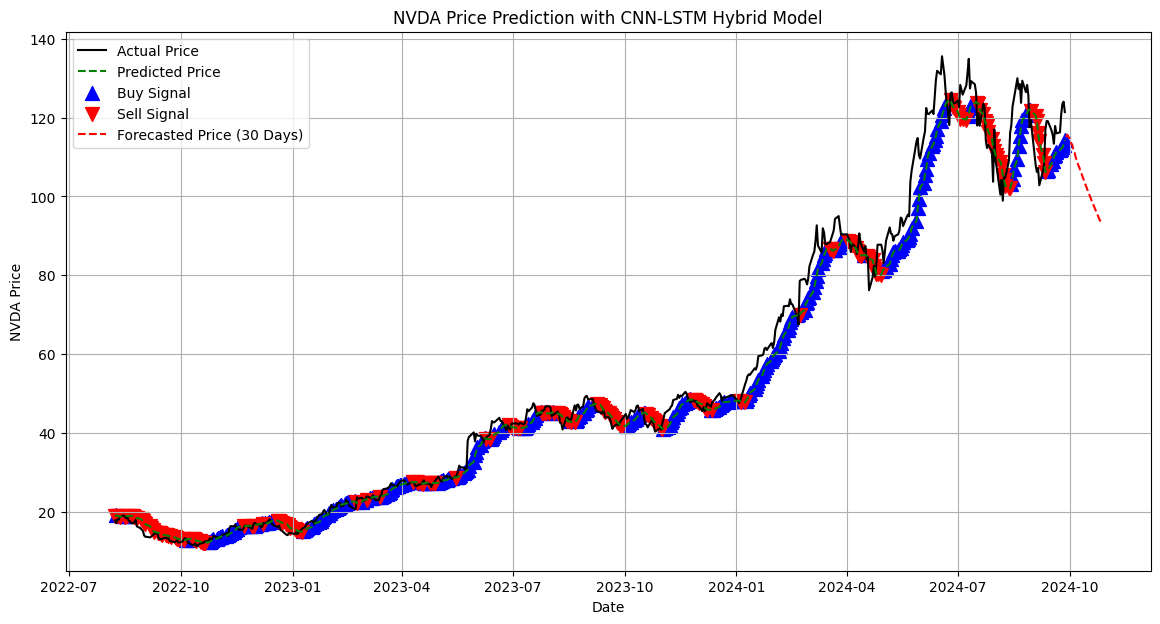

Processing GOOGL...


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0180 - val_loss: 0.0013
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7240e-04 - val_loss: 8.1984e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0639e-04 - val_loss: 7.5374e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8538e-04 - val_loss: 7.6585e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9371e-04 - val_loss: 0.0012
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9350e-04 - val_loss: 7.6411e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9170e-04 - val_loss: 7.8229e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7274e-04 - val_loss: 7.3937e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7039e-04 - val_loss: 7.5682e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9152e-04 - val_loss: 7.3192e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
GOOGL Train RMSE: 2.2

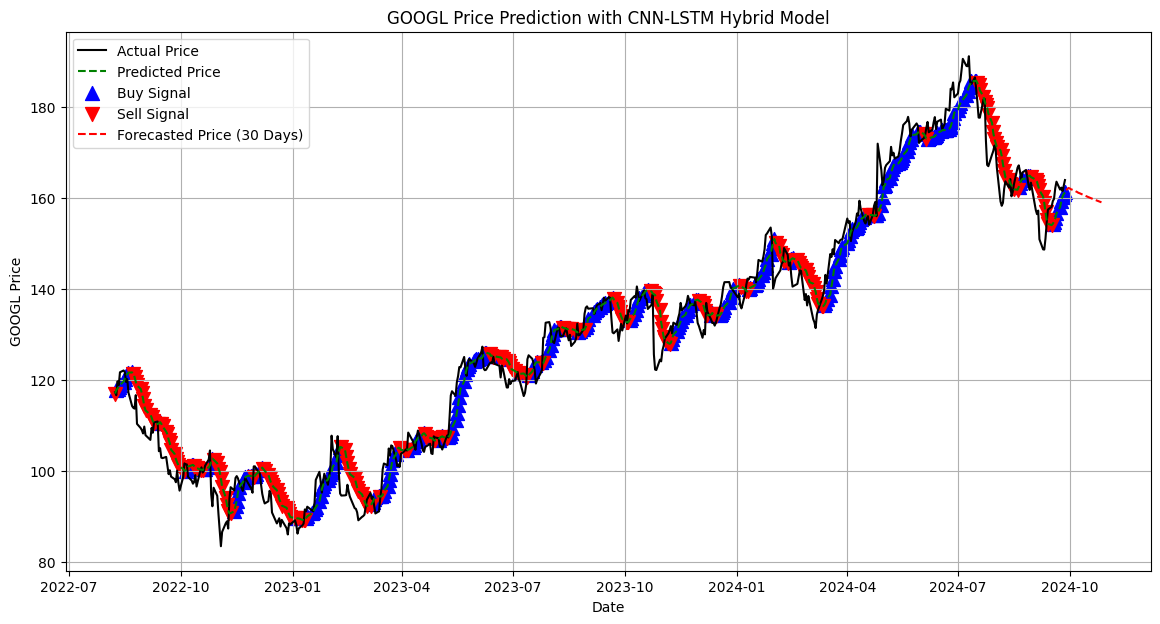

Processing AMZN...


[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0738 - val_loss: 9.2508e-04
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1535e-04 - val_loss: 8.9808e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4421e-04 - val_loss: 0.0011
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7805e-04 - val_loss: 8.6382e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5927e-04 - val_loss: 0.0011
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9169e-04 - val_loss: 8.3388e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8175e-04 - val_loss: 8.4055e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8291e-04 - val_loss: 8.1153e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9837e-04 - val_loss: 9.9414e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6090e-04 - val_loss: 8.6320e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AMZN Tra

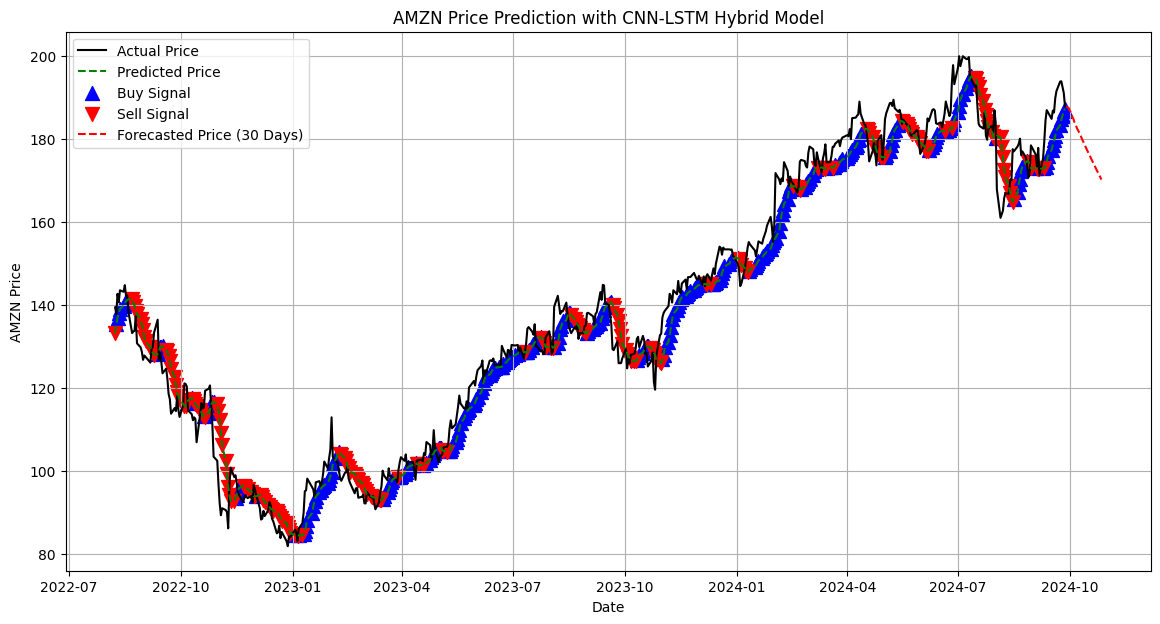

In [22]:

stocks = ["AAPL", "MSFT", "NVDA", "GOOGL", "AMZN"]

def process_stocks(pair):
    print(f"Processing {pair}...")

    
    start_date = "2014-01-01"
    end_date = "2024-09-30"
    data = yf.download(pair, start=start_date, end=end_date)
    data = data.reset_index()

    # Prepare the data
    data['Return'] = data['Close'].pct_change().dropna()

    # Feature Scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    seq_length = 10  
    X, y = create_sequences(scaled_data, seq_length)

    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

   
    model = Sequential()

    # CNN Layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM Layer 
    model.add(LSTM(units=50, return_sequences=False))  
    model.add(Dense(1))   
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

   
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Inverse scale the predictions and actual data
    y_train_pred_rescaled = scaler.inverse_transform(y_train_pred)
    y_test_pred_rescaled = scaler.inverse_transform(y_test_pred)
    y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculating RMSE and MAE
    train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
    test_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
    train_mae = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
    test_mae = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)

    print(f"{pair} Train RMSE: {train_rmse:.4f}, Train MAE: {train_mae:.4f}")
    print(f"{pair} Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

    # DataFrame for actual vs predicted values
    test_dates = data['Date'].iloc[len(y_train) + seq_length:].reset_index(drop=True)
    comparison_df = pd.DataFrame({'Date': test_dates, 
                                  'Actual Price': y_test_rescaled.flatten(), 
                                  'Predicted Price': y_test_pred_rescaled.flatten()})

    
    comparison_df['Signal'] = np.where(comparison_df['Predicted Price'].diff() > 0, 'Buy', 'Sell')

   
    last_sequence = scaled_data[-seq_length:] 
    forecast = []

    for _ in range(30):  # Predicting 30 days ahead
        last_sequence = last_sequence.reshape((1, seq_length, 1))
        next_prediction = model.predict(last_sequence)[0, 0]
        forecast.append(next_prediction)

        # Update the sequence with the new prediction
        last_sequence = np.append(last_sequence.flatten()[1:], next_prediction)
        last_sequence = last_sequence.reshape((seq_length, 1))

    # Inverse scale the forecasted values
    forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

    
    predicted_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
    predicted_df = pd.DataFrame({'Date': predicted_dates, 'Forecasted Price': forecast_rescaled.flatten()})

    # Plotting actual vs predicted prices and forecast
    plt.figure(figsize=(14, 7))

    # Plotting the actual prices and the predicted prices
    plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label='Actual Price', color='black')
    plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Price', color='green', linestyle='--')

    # Plotting the buy/sell signals
    buy_signals = comparison_df[comparison_df['Signal'] == 'Buy']
    sell_signals = comparison_df[comparison_df['Signal'] == 'Sell']
    plt.scatter(buy_signals['Date'], buy_signals['Predicted Price'], marker='^', color='blue', label='Buy Signal', s=100)
    plt.scatter(sell_signals['Date'], sell_signals['Predicted Price'], marker='v', color='red', label='Sell Signal', s=100)

    # Plotting forecasted prices
    plt.plot(predicted_df['Date'], predicted_df['Forecasted Price'], label='Forecasted Price (30 Days)', color='red', linestyle='--')

   
    plt.title(f'{pair} Price Prediction with CNN-LSTM Hybrid Model')
    plt.xlabel('Date')
    plt.ylabel(f'{pair} Price')
    plt.legend()
    plt.grid()
    plt.show()

    
    comparison_df.tail(20)

# Loop through each currency pair
for pair in stocks:
    process_stocks(pair)


## BACKTESTING CNN_LSTM MODEL

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1669 - val_loss: 8.2261e-04
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 9.1587e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 7.6921e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 6.7091e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 7.1874e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 6.3846e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 7.3987e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - val_loss: 7.6006e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - val_loss: 6.6067e-04
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 0.0090, Train MAE: 0.0069
Test RMSE:

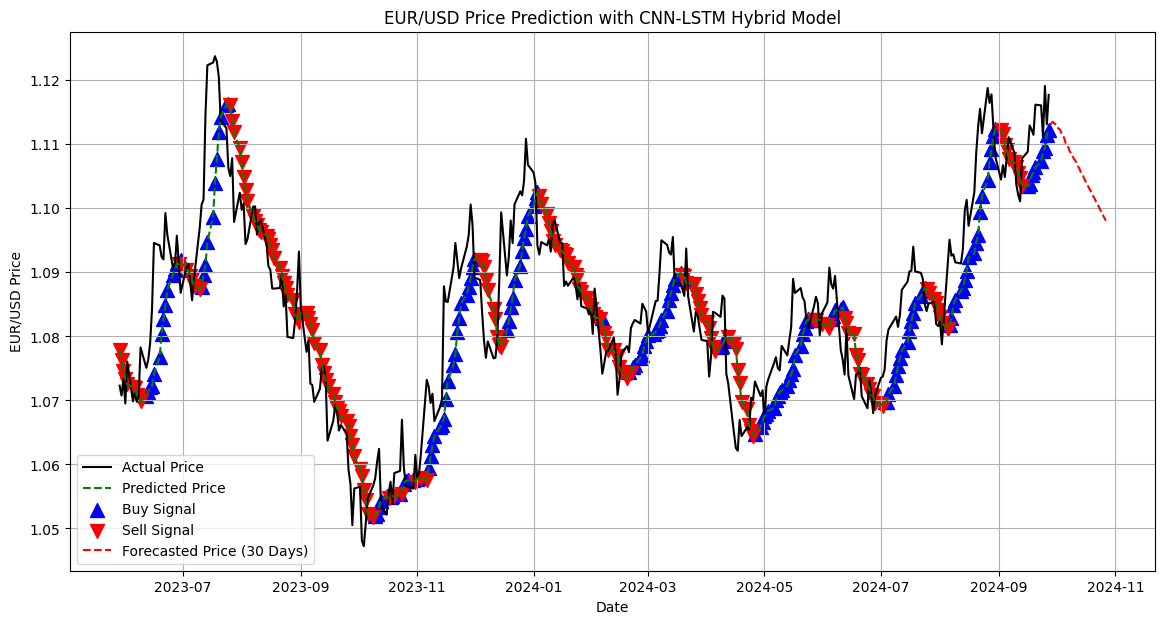

Final Portfolio Value: $119140.91
Return: 19.14%


C:\Users\Admin\AppData\Local\Temp\ipykernel_13040\4129268640.py:156: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  comparison_df['Portfolio Value'].iloc[1:] = portfolio_value  # Skip the first element for initial balance
C:\Users\Admin\AppDa

Date  Actual Price  Predicted Price Signal  Portfolio Value
330 2024-09-02      1.104484         1.112246   Sell    118196.068125
331 2024-09-03      1.106746         1.111681   Sell    118196.068125
332 2024-09-04      1.104887         1.109826   Sell    118196.068125
333 2024-09-05      1.108045         1.109144   Sell    118196.068125
334 2024-09-06      1.111111         1.107655   Sell    118196.068125
335 2024-09-09      1.108721         1.107217   Sell    118196.068125
336 2024-09-10      1.103753         1.106494   Sell    118196.068125
337 2024-09-11      1.102098         1.105487   Sell    118196.068125
338 2024-09-12      1.101091         1.104663   Sell    118196.068125
339 2024-09-13      1.107788         1.103455   Sell    118196.068125
340 2024-09-16      1.108844         1.103458    Buy    118196.068125
341 2024-09-17      1.112954         1.103776    Buy    118230.212479
342 2024-09-18      1.112310         1.105161    Buy    118378.537389
343 2024-09-19      1.111482         1.105605    Buy    118426.101980
344 2024-09-20      1.116196         1.106437    Buy    118515.255262
345 2024-09-23      1.116084         1.107337    Buy    118611.635808
346 2024-09-24      1.111173         1.108890    Buy    118777.913958
347 2024-09-25      1.119119         1.109487    Buy    118841.950582
348 2024-09-26      1.113102         1.111409    Buy    119047.799917
349 2024-09-27      1.117718         1.112278    Buy    119140.911594

In [26]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler

# Step 1: Fetch the data
start_date = "2018-01-01"
end_date = "2024-09-30"
data = yf.download("EURUSD=X", start=start_date, end=end_date)
data = data.reset_index()

# Step 2: Prepare the data
data['Return'] = data['Close'].pct_change().dropna()

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 10  # Sequence length (window size)
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for CNN input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build the CNN-LSTM Hybrid Model
model = Sequential()

# CNN Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer (No need to flatten, pass directly to LSTM)
model.add(LSTM(units=50, return_sequences=False))

# Dense Layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scale the predictions and actual data
y_train_pred_rescaled = scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = scaler.inverse_transform(y_test_pred)
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 8: Calculate RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
test_rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
train_mae = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
test_mae = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)

print(f"Train RMSE: {train_rmse:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

# Step 9: Create DataFrame for actual vs predicted values
test_dates = data['Date'].iloc[len(y_train) + seq_length:].reset_index(drop=True)
comparison_df = pd.DataFrame({'Date': test_dates, 
                              'Actual Price': y_test_rescaled.flatten(), 
                              'Predicted Price': y_test_pred_rescaled.flatten()})

# Step 10: Generate Buy/Sell Signals based on the predicted return
comparison_df['Signal'] = np.where(comparison_df['Predicted Price'].diff() > 0, 'Buy', 'Sell')

# Step 11: Forecasting for the next 30 days
last_sequence = scaled_data[-seq_length:]  # Last window of data
forecast = []

for _ in range(30):  # Predicting 30 days ahead
    last_sequence = last_sequence.reshape((1, seq_length, 1))
    next_prediction = model.predict(last_sequence)[0, 0]
    forecast.append(next_prediction)
    
    # Update the sequence with the new prediction
    last_sequence = np.append(last_sequence.flatten()[1:], next_prediction)
    last_sequence = last_sequence.reshape((seq_length, 1))

# Inverse scale the forecasted values
forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Step 12: Plotting the actual vs predicted prices and forecast
# Creating a DataFrame for the forecasted period
predicted_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
predicted_df = pd.DataFrame({'Date': predicted_dates, 'Forecasted Price': forecast_rescaled.flatten()})

# Plot actual vs predicted prices and forecast
plt.figure(figsize=(14, 7))

# Plot the actual prices and the predicted prices
plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label='Actual Price', color='black')
plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Price', color='green', linestyle='--')

# Plot the buy/sell signals
buy_signals = comparison_df[comparison_df['Signal'] == 'Buy']
sell_signals = comparison_df[comparison_df['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Predicted Price'], marker='^', color='blue', label='Buy Signal', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Predicted Price'], marker='v', color='red', label='Sell Signal', s=100)

# Plot forecasted prices
plt.plot(predicted_df['Date'], predicted_df['Forecasted Price'], label='Forecasted Price (30 Days)', color='red', linestyle='--')

# Plot settings
plt.title('EUR/USD Price Prediction with CNN-LSTM Hybrid Model')
plt.xlabel('Date')
plt.ylabel('EUR/USD Price')
plt.legend()
plt.grid()
plt.show()

# Step 13: Backtesting the strategy
initial_balance = 100000  # Initial amount in USD
position = 0  # Whether we're holding the asset or not
balance = initial_balance  # Starting balance
portfolio_value = []

# Create a DataFrame to store portfolio value over time
comparison_df['Portfolio Value'] = np.nan

for i in range(1, len(comparison_df)):
    if comparison_df['Signal'].iloc[i] == 'Buy' and position == 0:
        # Buy the asset
        position = balance / comparison_df['Predicted Price'].iloc[i]
        balance = 0
    elif comparison_df['Signal'].iloc[i] == 'Sell' and position > 0:
        # Sell the asset
        balance = position * comparison_df['Predicted Price'].iloc[i]
        position = 0
    portfolio_value.append(balance + position * comparison_df['Predicted Price'].iloc[i] if position > 0 else balance)

# Fill the portfolio value into the DataFrame
comparison_df['Portfolio Value'].iloc[1:] = portfolio_value  # Skip the first element for initial balance

# Final portfolio value
final_portfolio_value = comparison_df['Portfolio Value'].iloc[-1] if not comparison_df['Portfolio Value'].isnull().all() else balance
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Return: {((final_portfolio_value - initial_balance) / initial_balance) * 100:.2f}%")

comparison_df.tail(20)


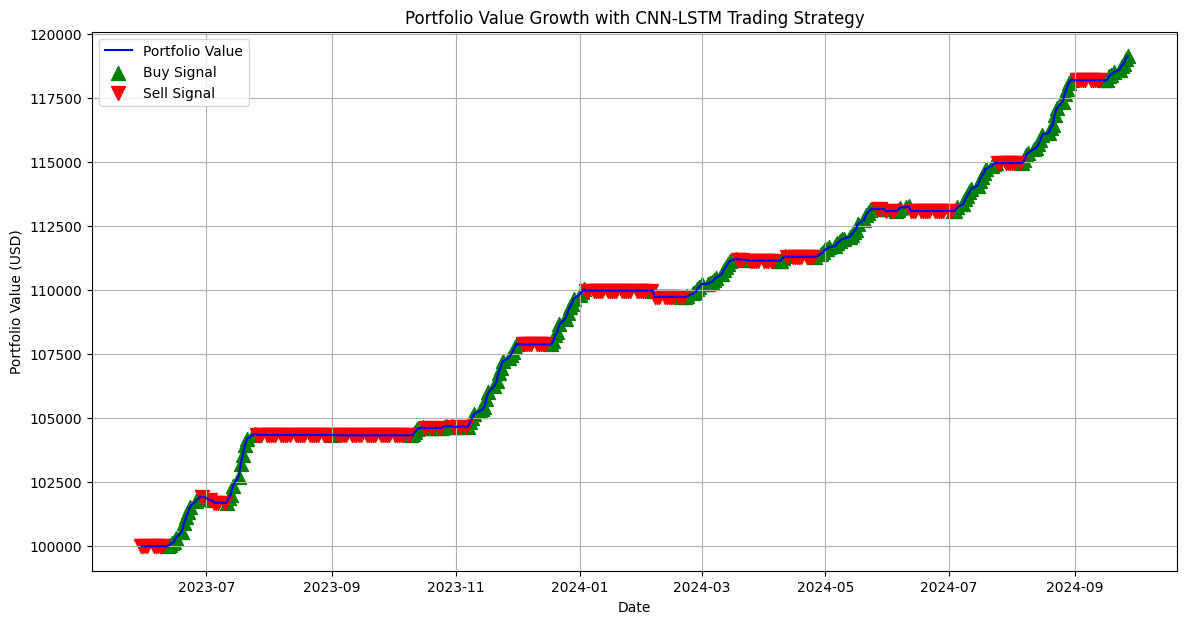

In [27]:
# Step 14: Plotting Portfolio Value Growth
plt.figure(figsize=(14, 7))

# Plot the portfolio value over time
plt.plot(comparison_df['Date'], comparison_df['Portfolio Value'], label='Portfolio Value', color='blue')

# Mark the buy and sell points
buy_signals = comparison_df[comparison_df['Signal'] == 'Buy']
sell_signals = comparison_df[comparison_df['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Portfolio Value'], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Portfolio Value'], marker='v', color='red', label='Sell Signal', s=100)

# Plot settings
plt.title('Portfolio Value Growth with CNN-LSTM Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid()
plt.show()


In [28]:
/pwd

'c:\\Users\\Admin\\Documents\\Capstone_Project'